# EX 1 Serial

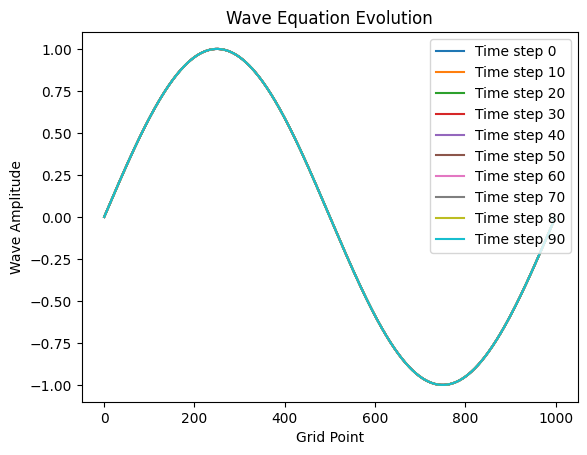

In [11]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory where output files are located
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'ex_1_serial'))

pattern = os.path.join(base_directory, "wave_output_*.txt")
files = glob.glob(pattern)

for file in files:
    data = np.loadtxt(file)
    plt.plot(data, label=f"Time step {file.split('_')[-1].split('.')[0]}")

plt.xlabel("Grid Point")
plt.ylabel("Wave Amplitude")
plt.title("Wave Equation Evolution")
plt.legend()
plt.show()

# EX 1 MPI 

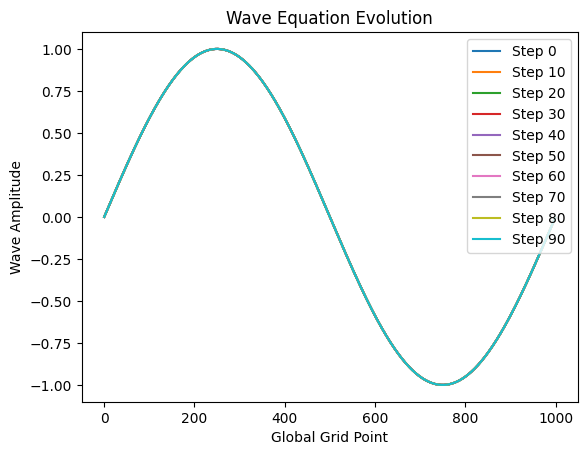

In [10]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory where output files are located
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'ex_1_mpi'))

# Pattern to match files with both step and rank in the filename
pattern = os.path.join(base_directory, "wave_output_step*_rank*.txt")
files = glob.glob(pattern)

# Organize files by time step
data_by_step = {}
for filepath in files:
    fname = os.path.basename(filepath)
    match = re.match(r"wave_output_step(\d+)_rank(\d+)\.txt", fname)
    if match:
        step = int(match.group(1))
        rank = int(match.group(2))
        data_by_step.setdefault(step, []).append((rank, filepath))

# Plot concatenated data for each time step
for step in sorted(data_by_step.keys()):
    # Sort by rank so we concatenate in the correct order
    ranked_files = sorted(data_by_step[step], key=lambda x: x[0])
    # Load and concatenate each rank's output
    arrays = [np.loadtxt(fp) for _, fp in ranked_files]
    full_wave = np.concatenate(arrays)
    plt.plot(full_wave, label=f"Step {step}")

plt.xlabel("Global Grid Point")
plt.ylabel("Wave Amplitude")
plt.title("Wave Equation Evolution")
plt.legend()
plt.show()


# Bonus Assignment Serial

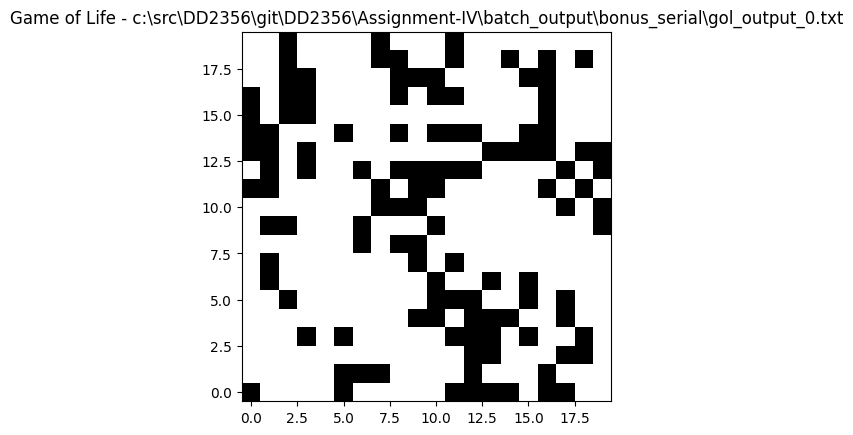

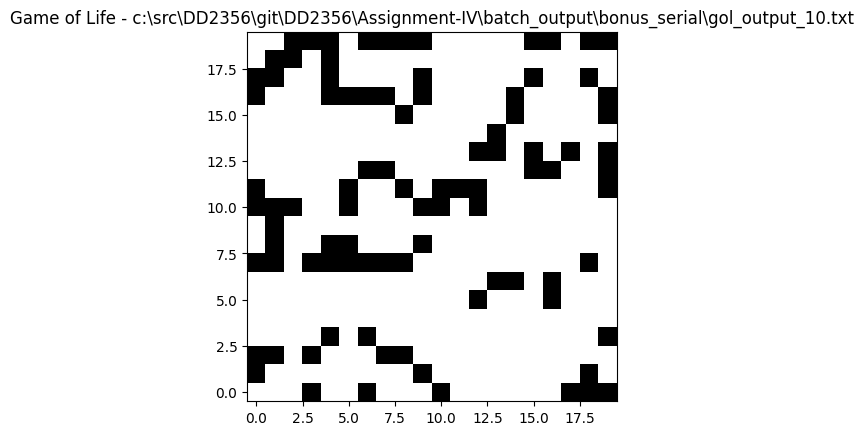

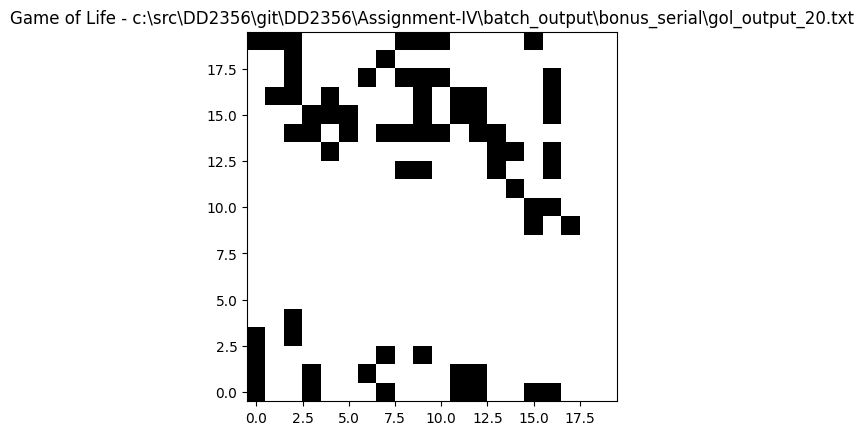

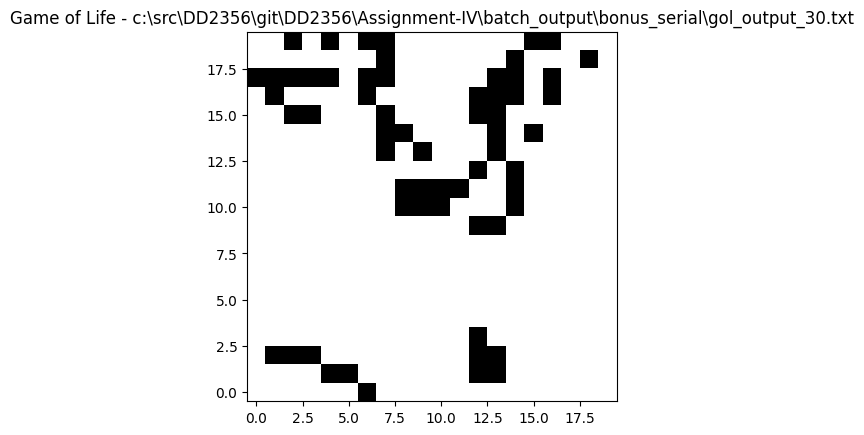

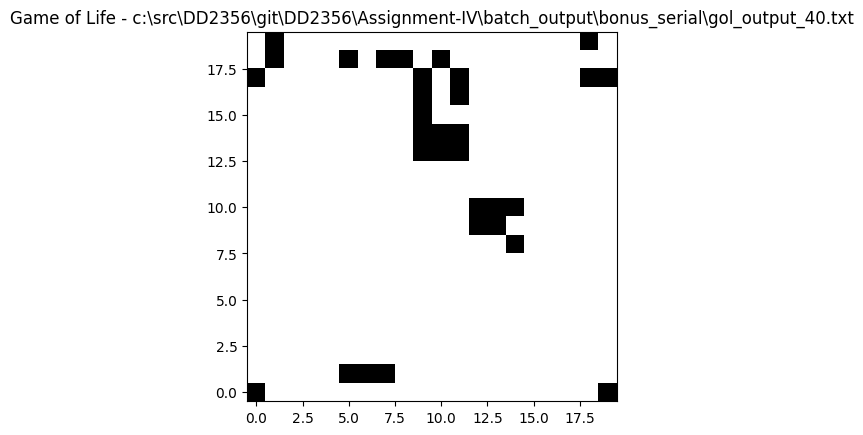

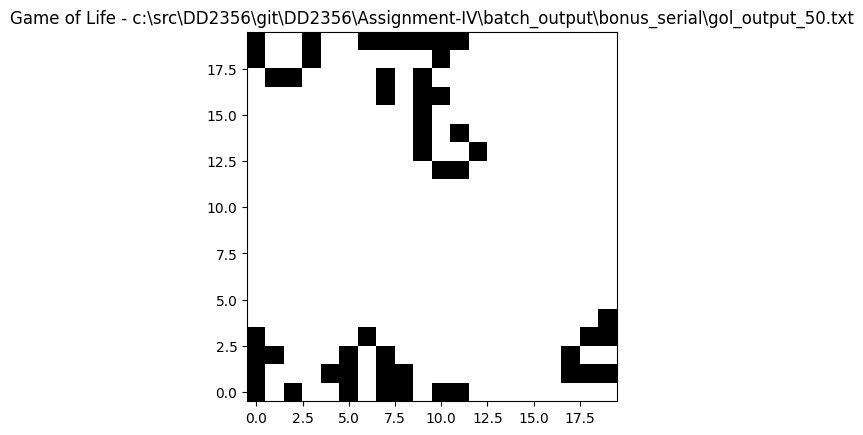

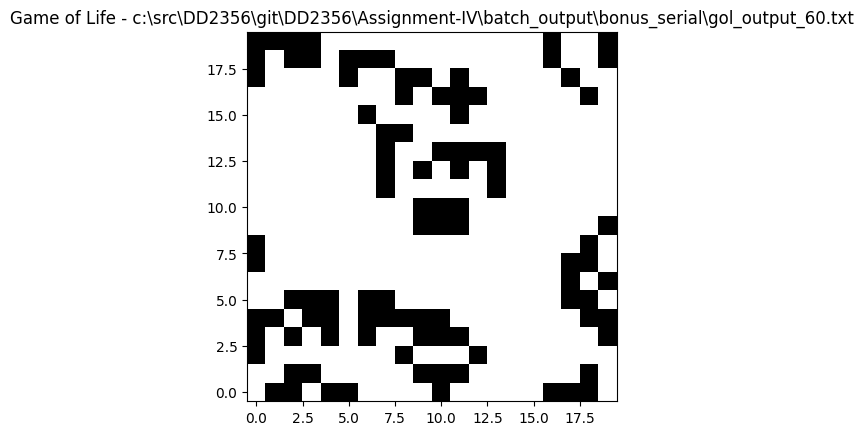

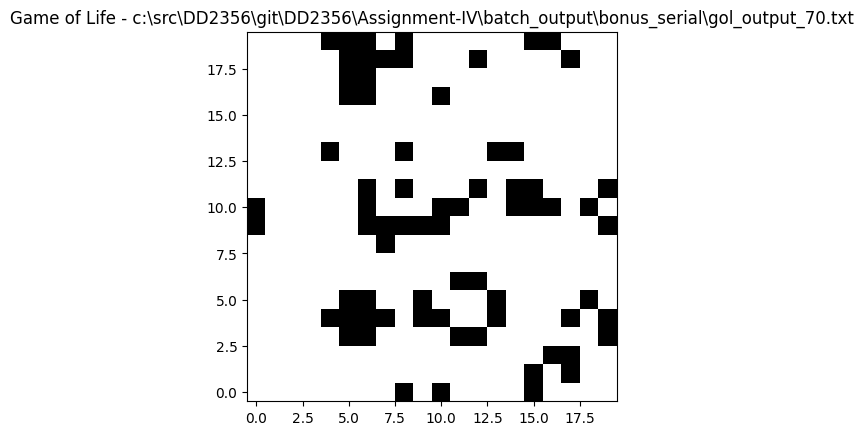

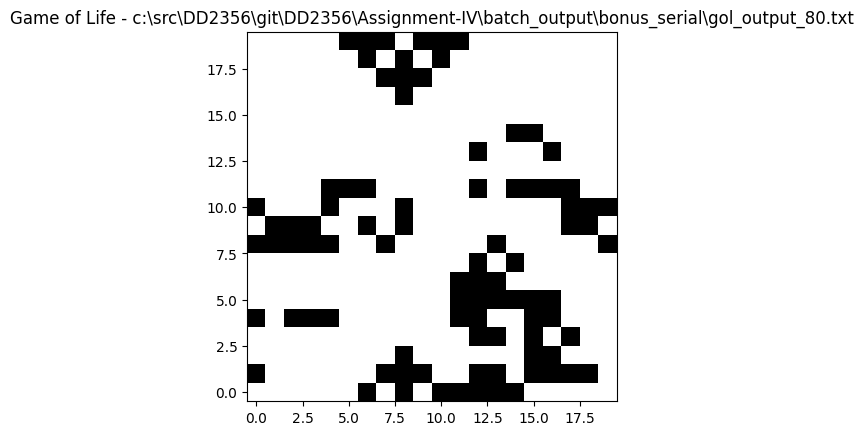

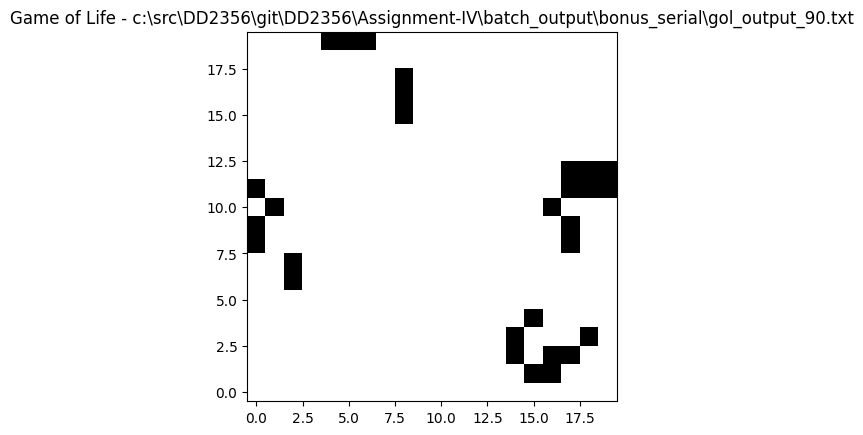

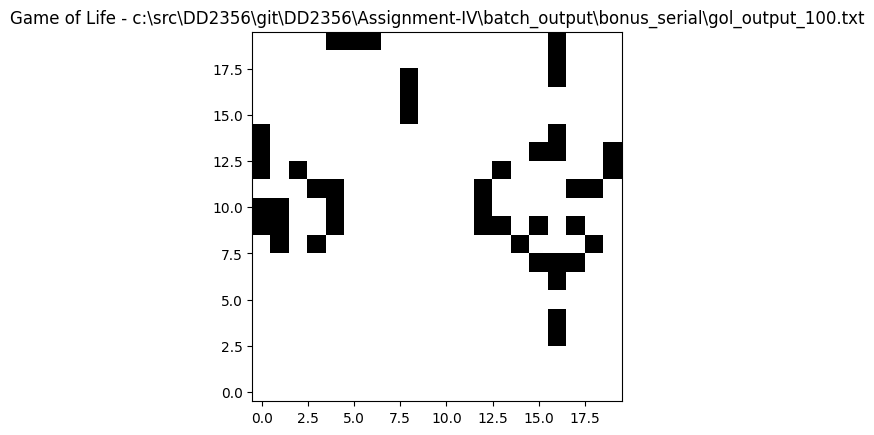

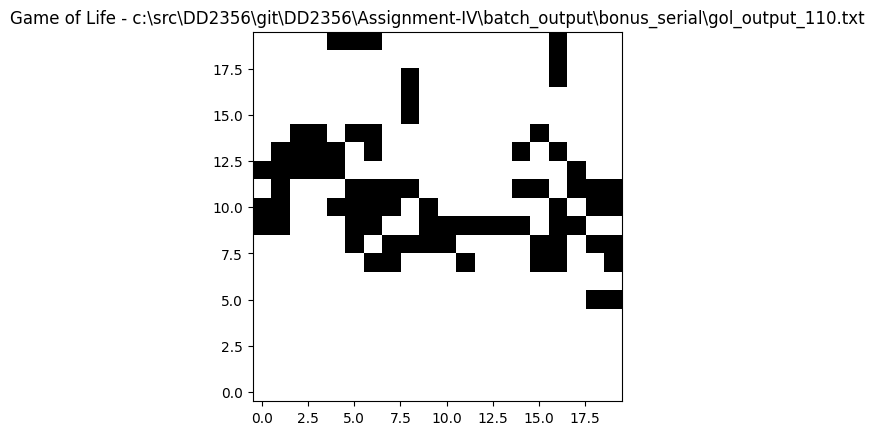

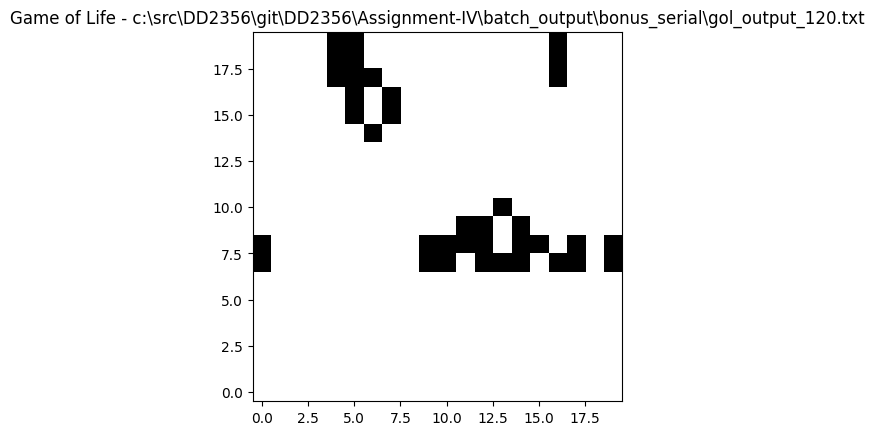

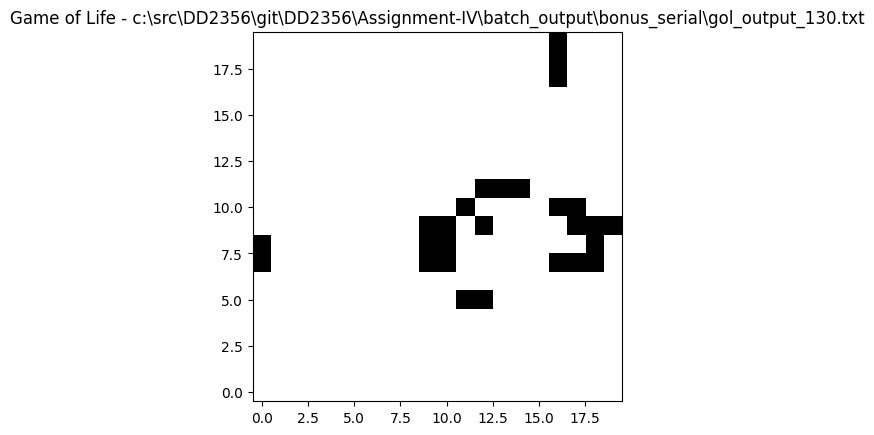

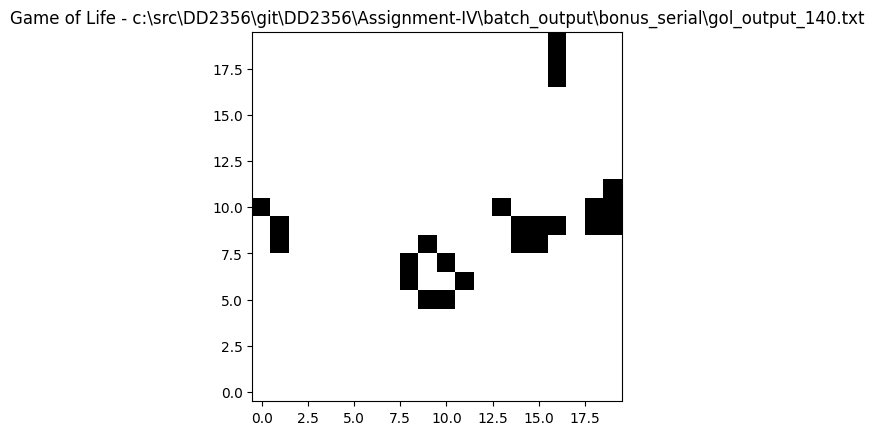

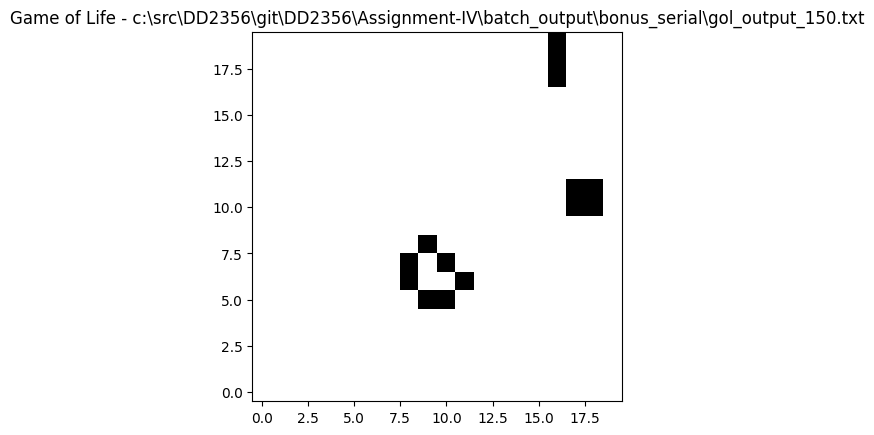

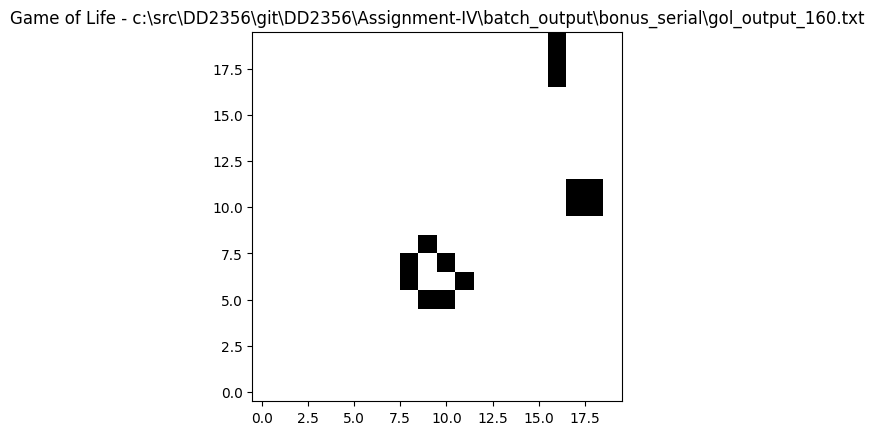

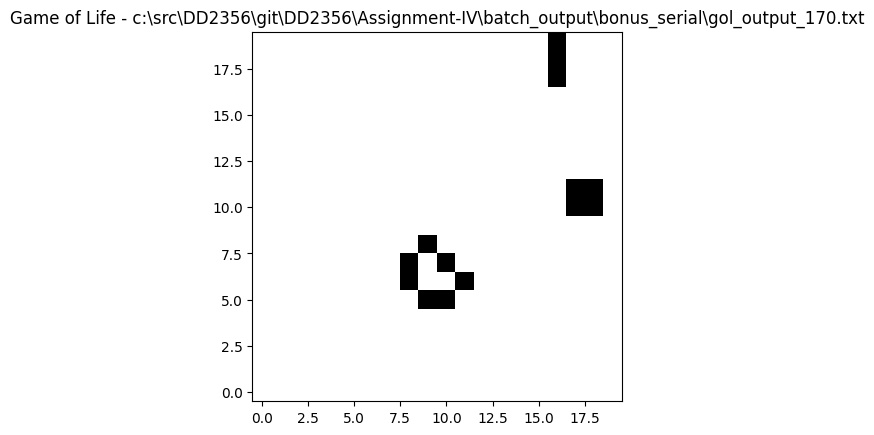

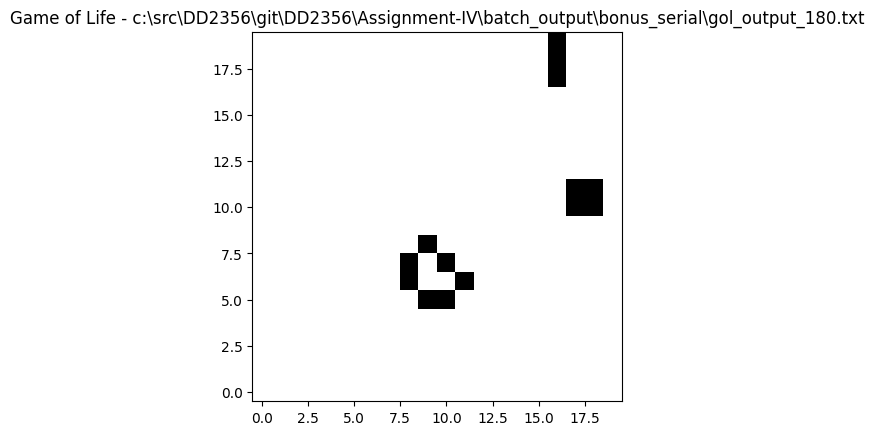

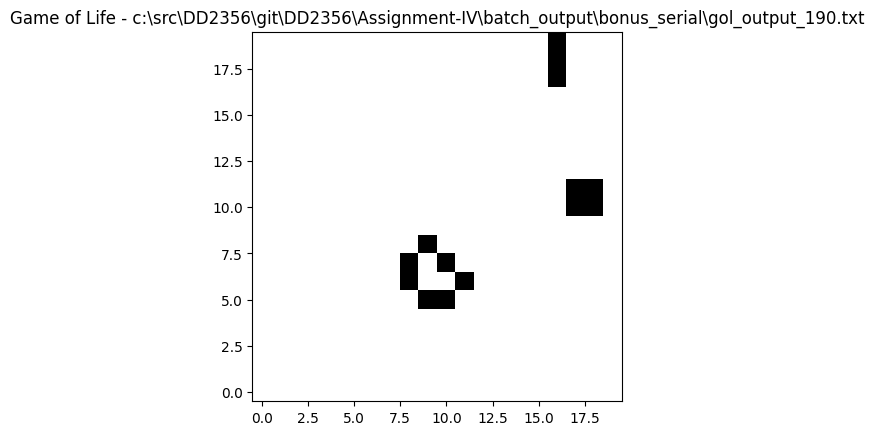

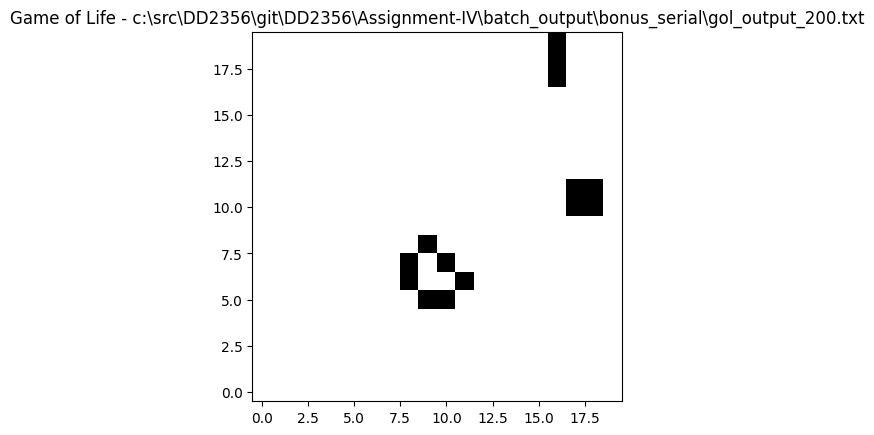

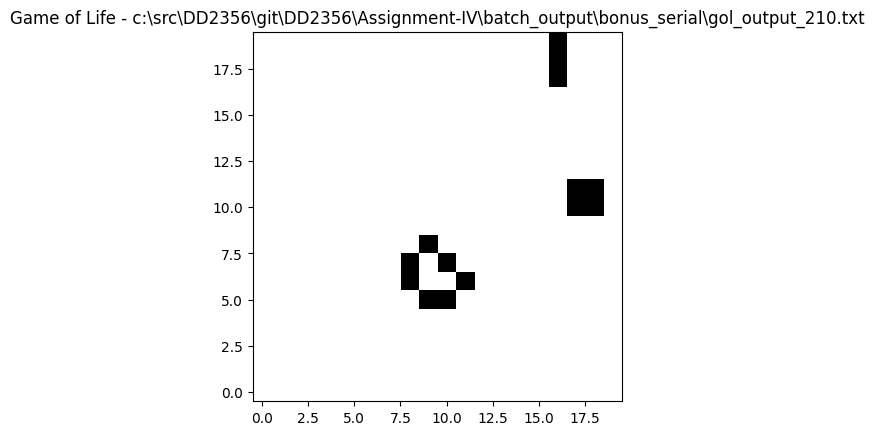

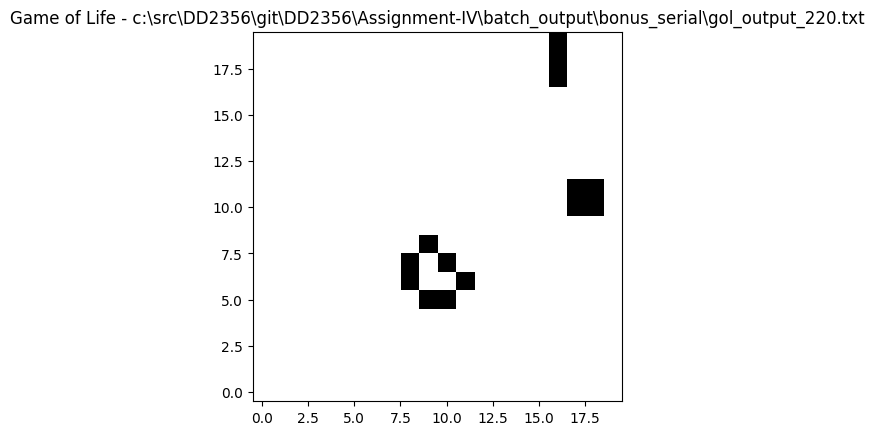

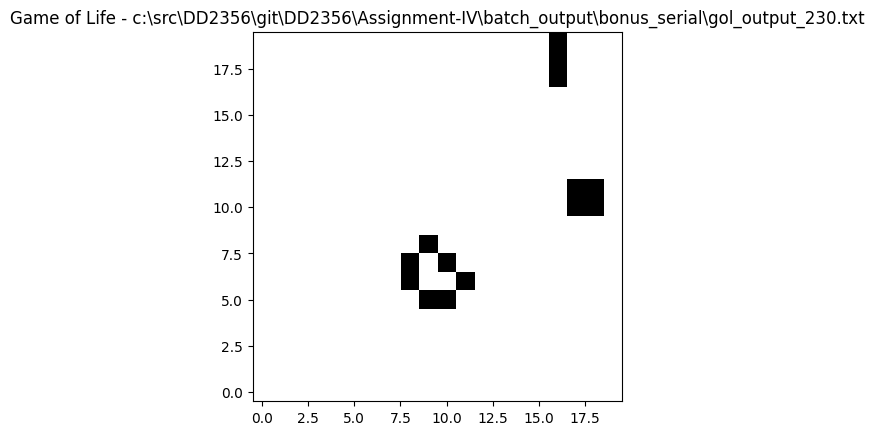

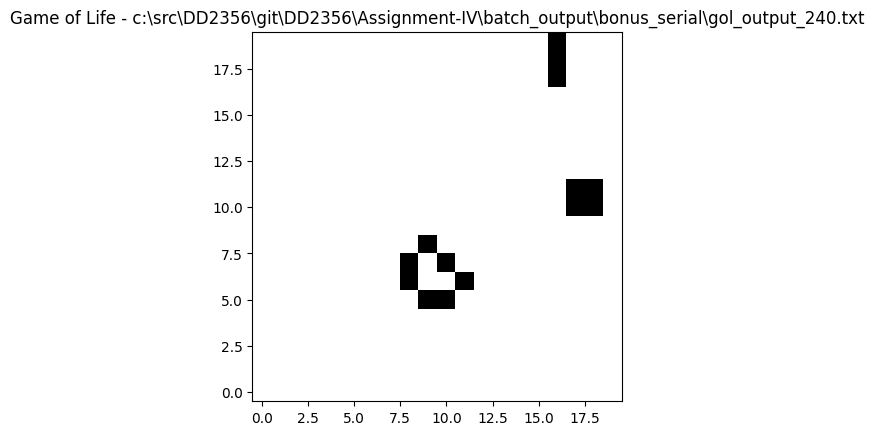

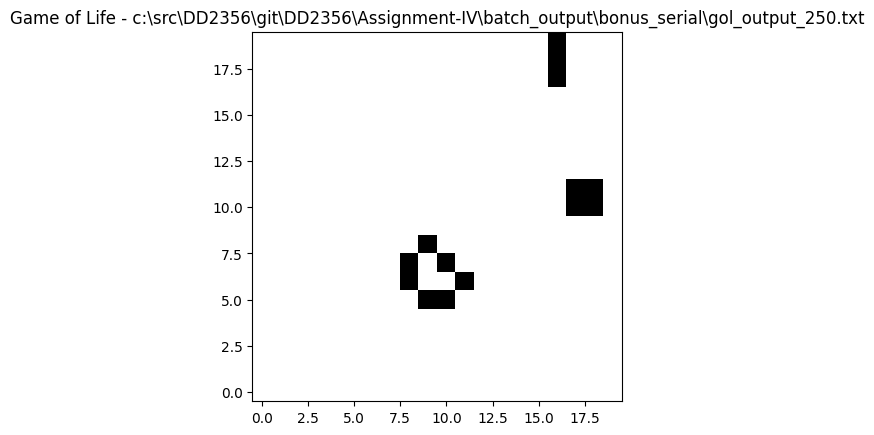

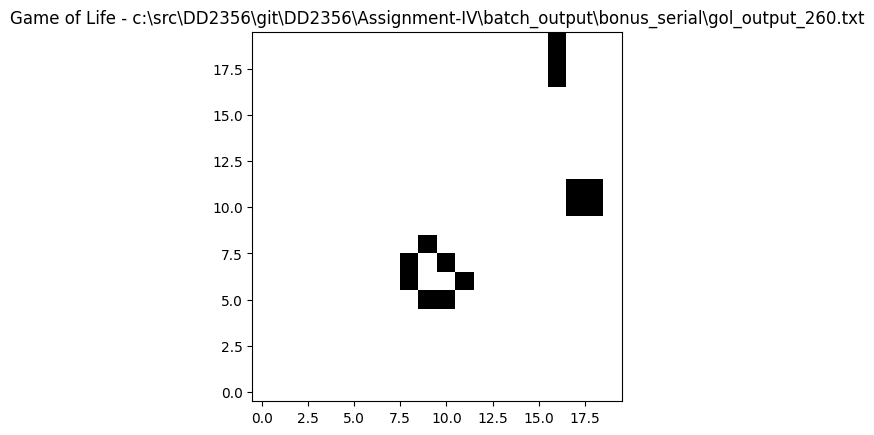

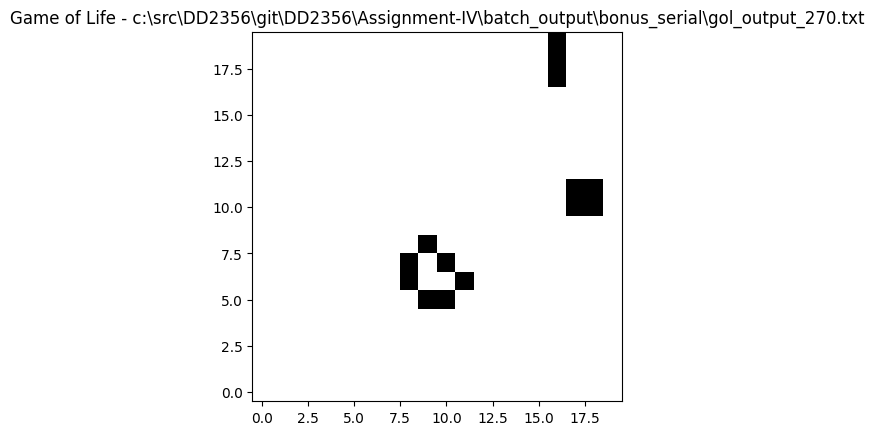

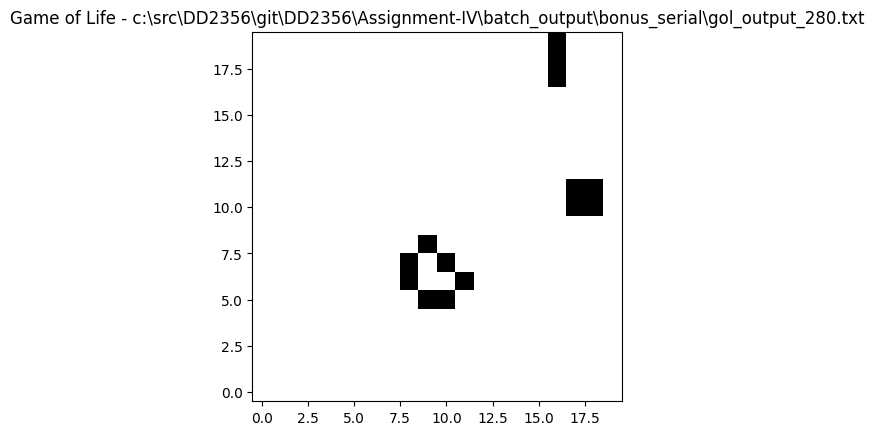

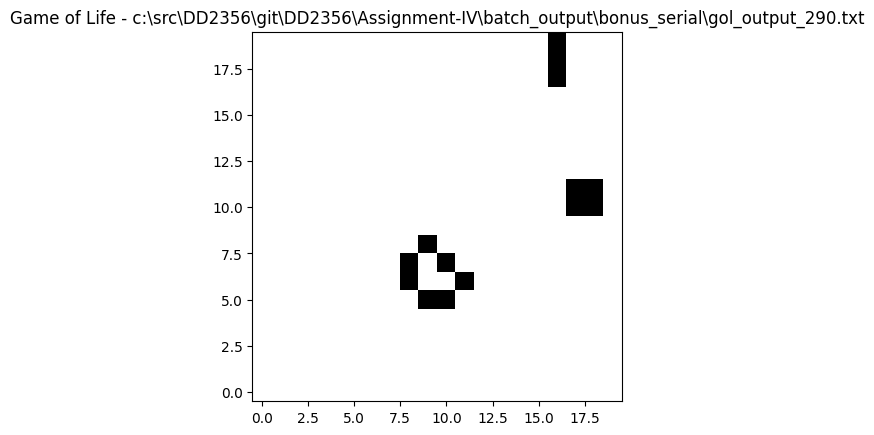

GIF saved at: c:\src\DD2356\git\DD2356\Assignment-IV\batch_output\bonus_serial\game_of_life_serial.gif


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import imageio.v2 as imageio  # imageio.v2 to avoid FutureWarnings

# Set up directories and file matching
current_working_directory = os.getcwd()
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'bonus_serial'))
pattern = os.path.join(base_directory, "gol_output_*.txt")
files = glob.glob(pattern)

# Sort files numerically by step number
files_sorted = sorted(
    files,
    key=lambda path: int(os.path.splitext(os.path.basename(path))[0].split('_')[-1])
)

# Create temporary list of images
images = []
for file in files_sorted:
    data = np.loadtxt(file)
    fig, ax = plt.subplots()
    ax.imshow(data, cmap='binary', origin='lower')
    ax.set_title(f"Step {os.path.basename(file)}")
    ax.axis('off')

    # Save to a temporary image buffer
    temp_path = f"{file}.png"
    plt.savefig(temp_path, bbox_inches='tight')
    plt.close(fig)
    images.append(imageio.imread(temp_path))
    os.remove(temp_path)  # clean up temporary image

# Save the gif
gif_path = os.path.join(base_directory, "game_of_life_serial.gif")
imageio.mimsave(gif_path, images, duration=0.8)

for file in files_sorted:
    data = np.loadtxt(file)
    plt.imshow(data, cmap='binary', origin='lower')
    plt.title(f"Game of Life - {file}")
    plt.pause(0.5)

print(f"GIF saved at: {gif_path}")


# Bonus Assignment MPI

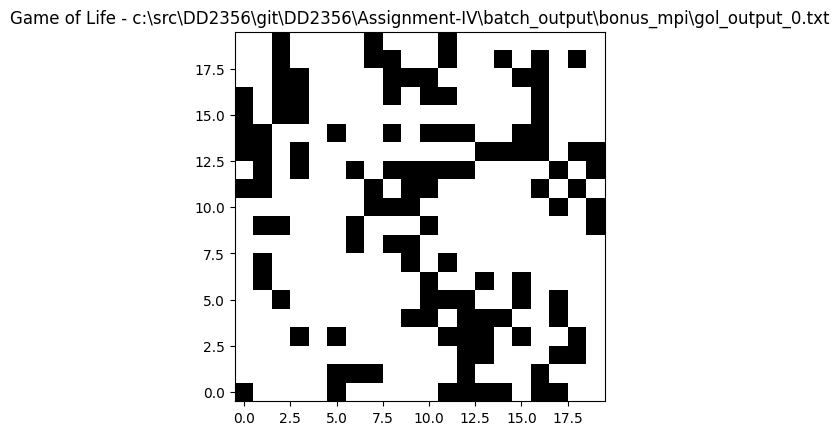

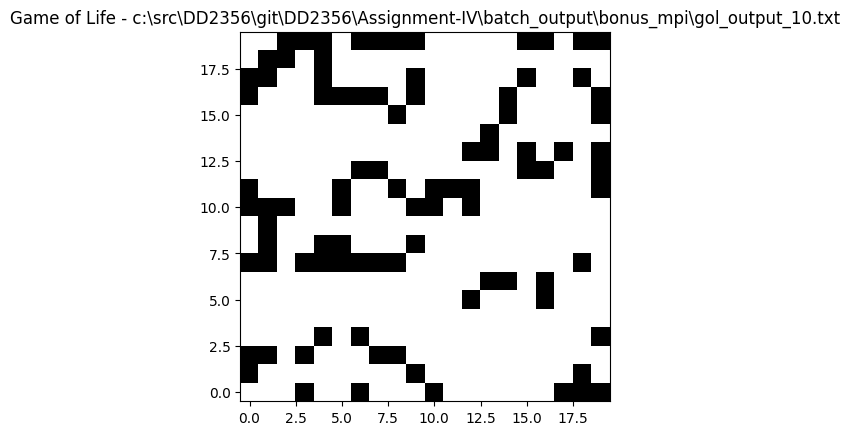

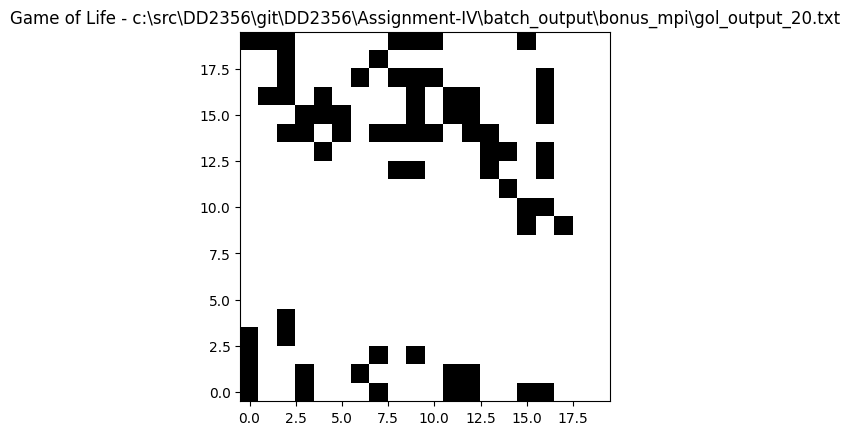

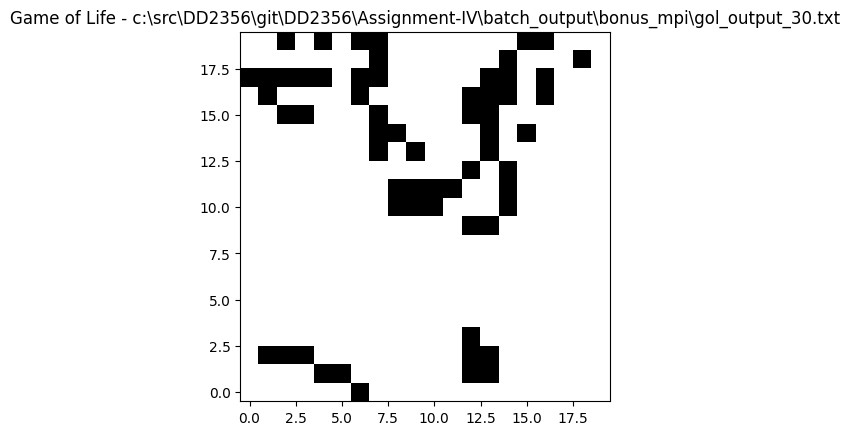

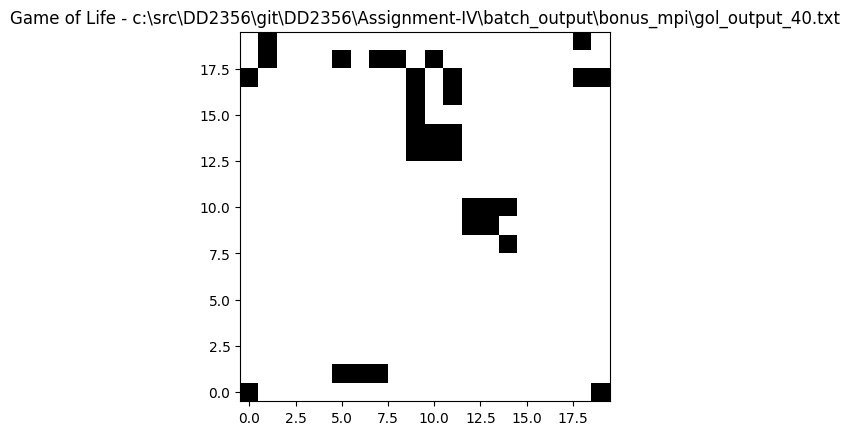

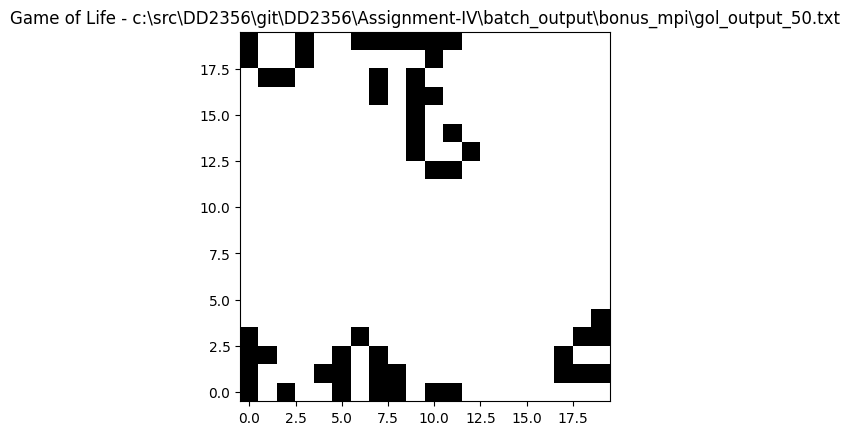

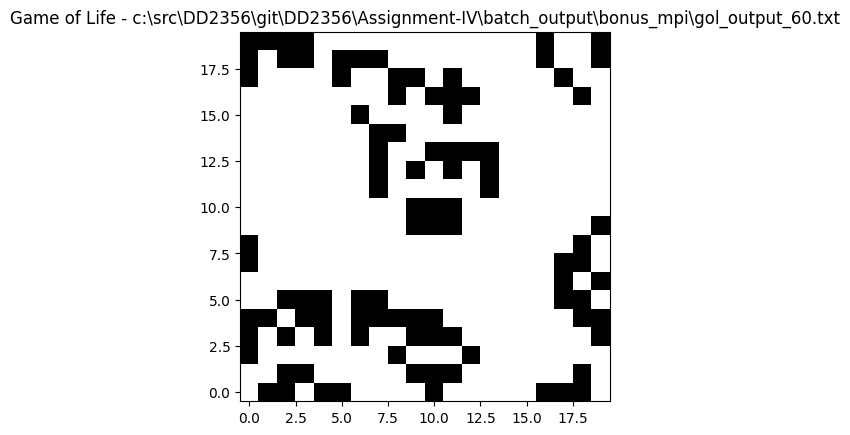

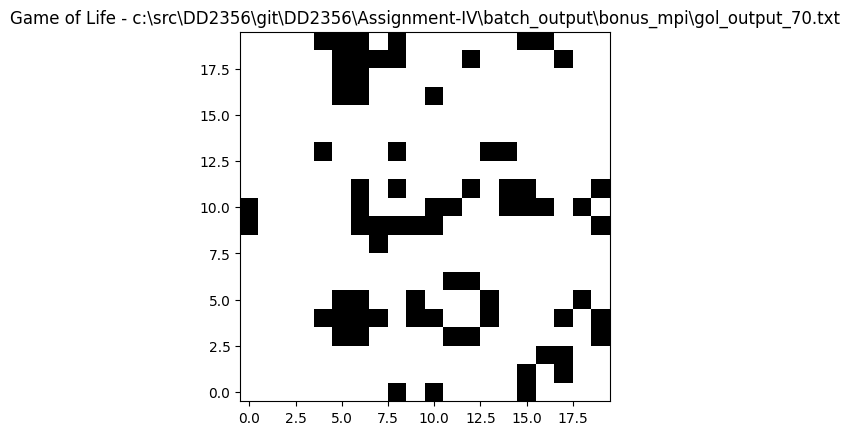

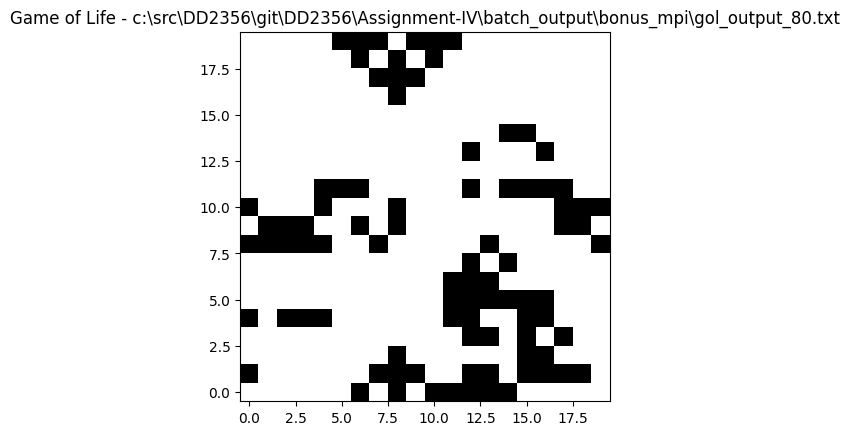

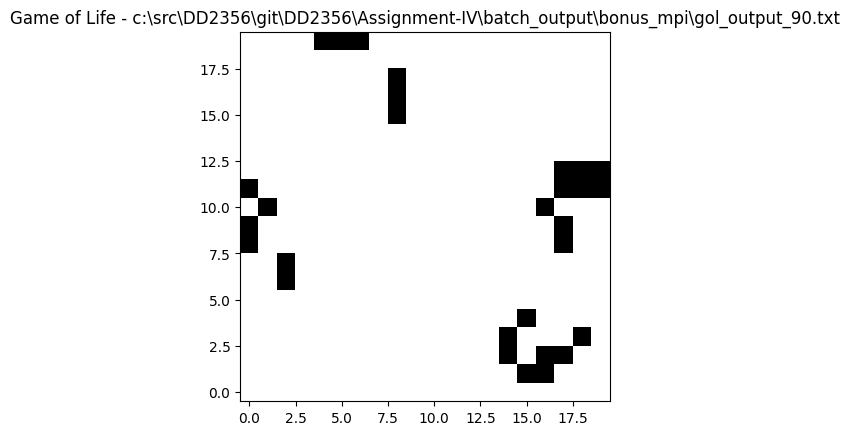

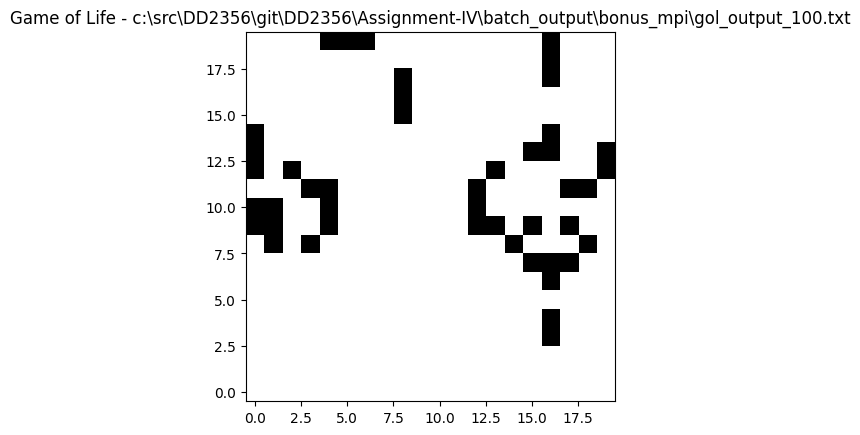

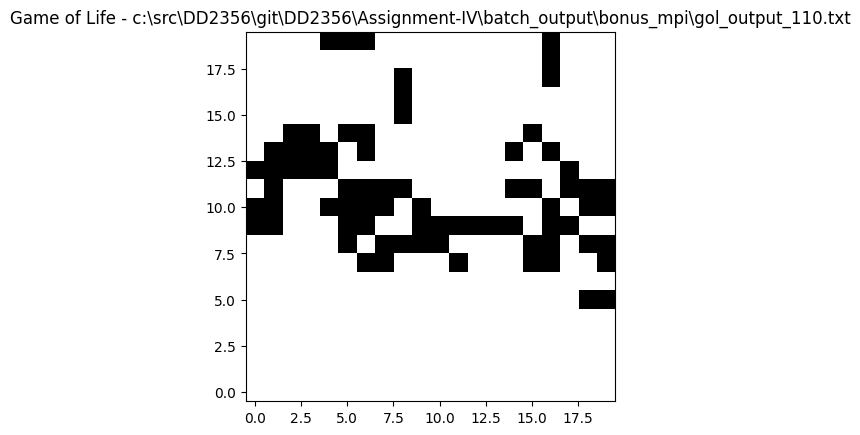

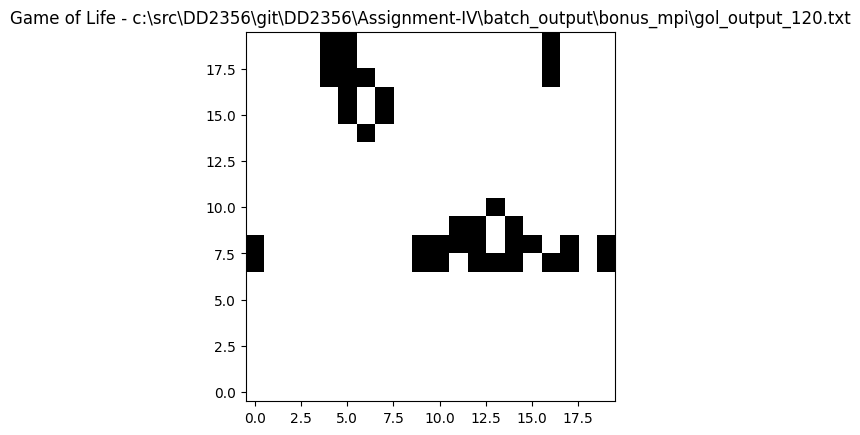

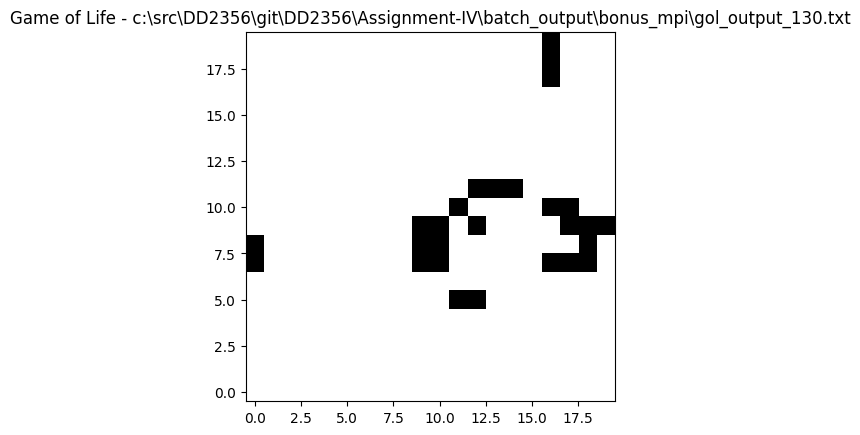

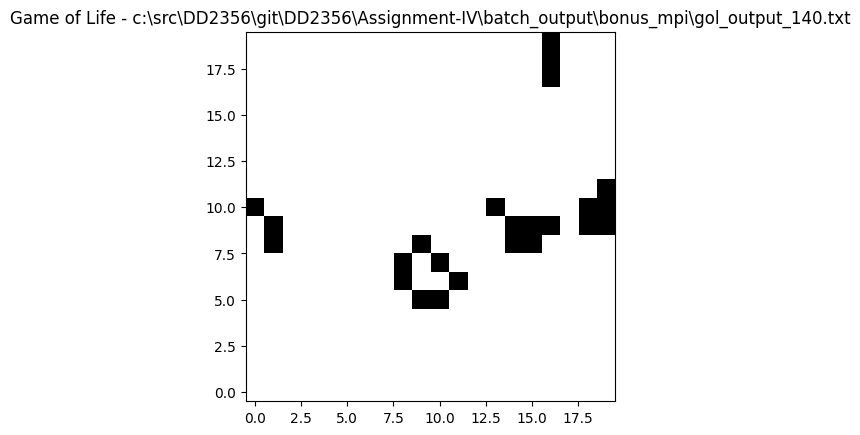

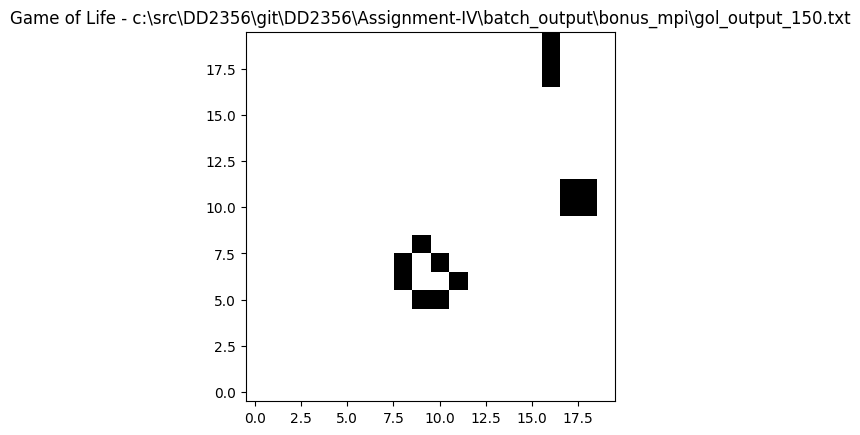

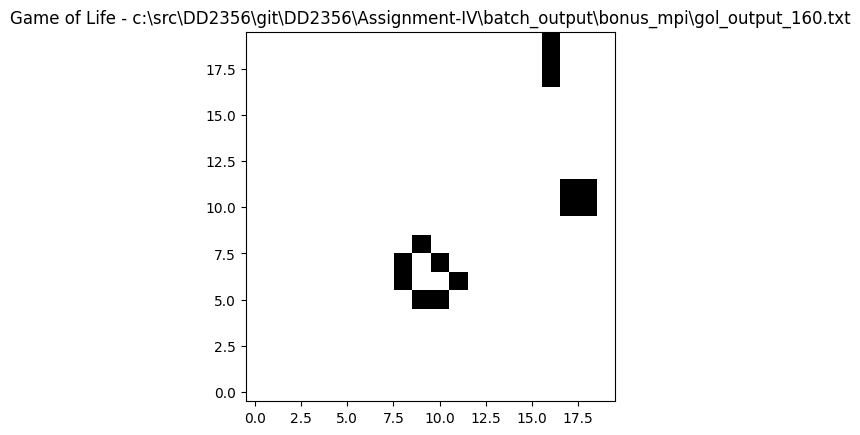

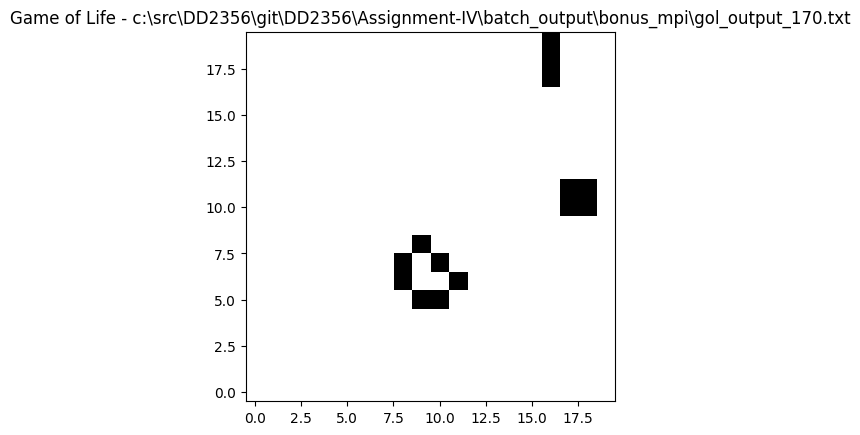

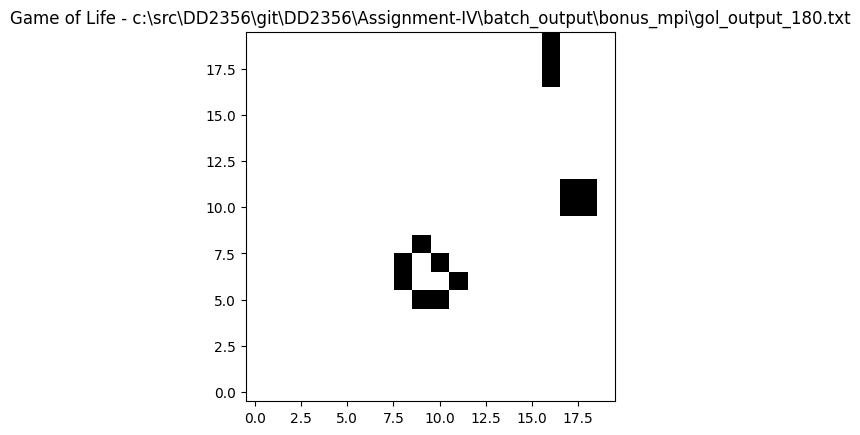

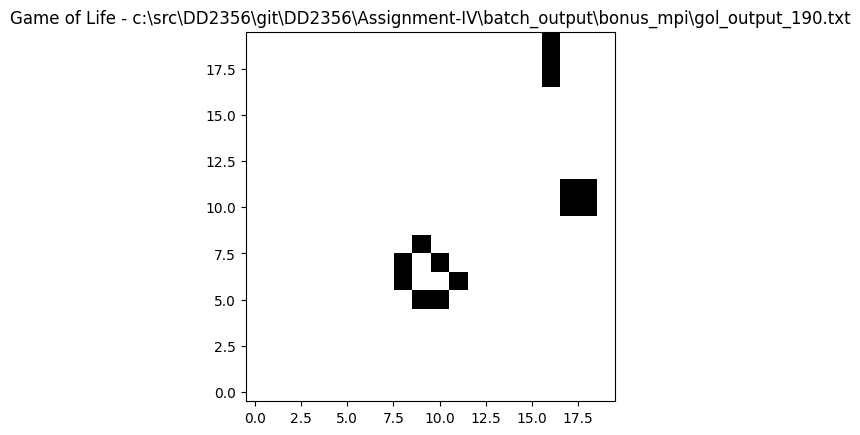

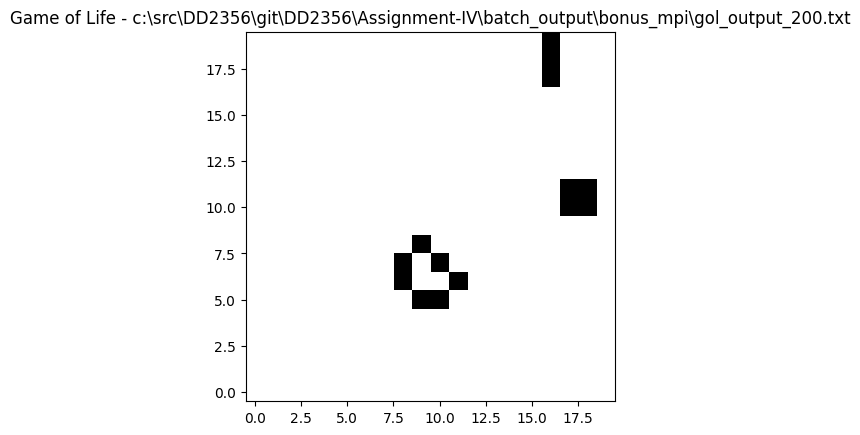

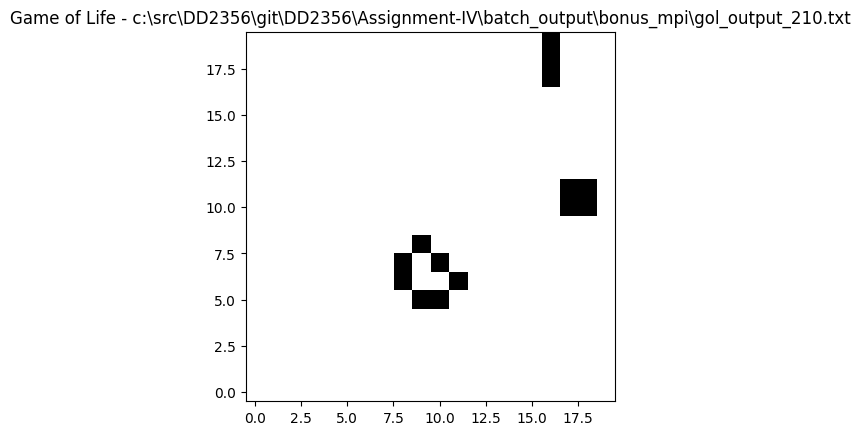

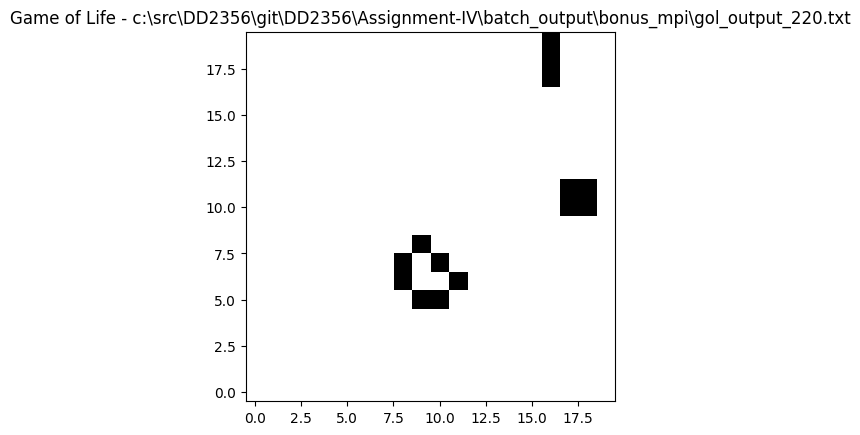

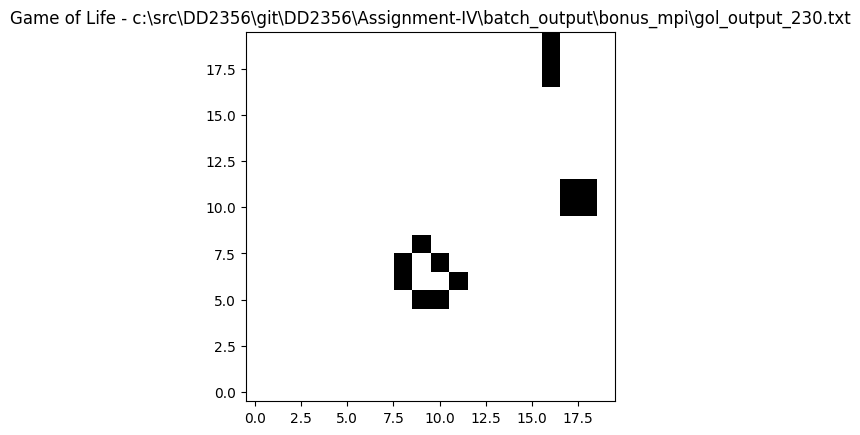

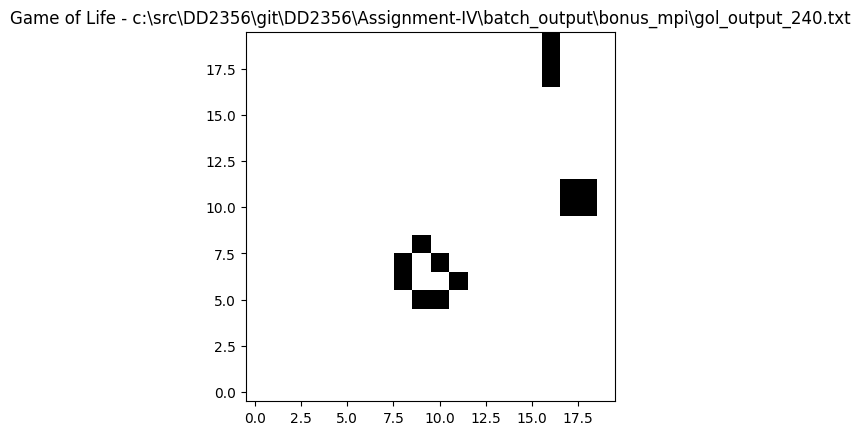

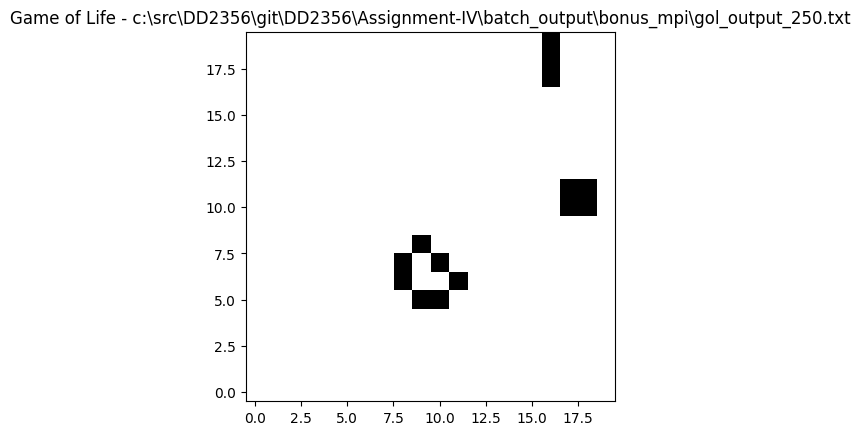

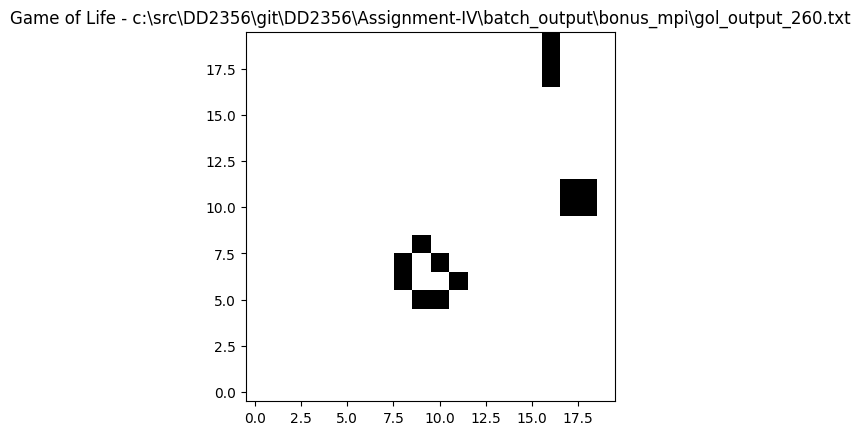

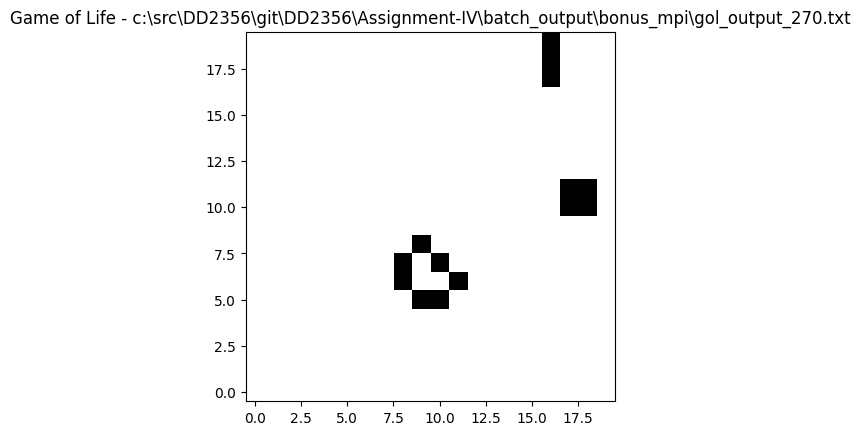

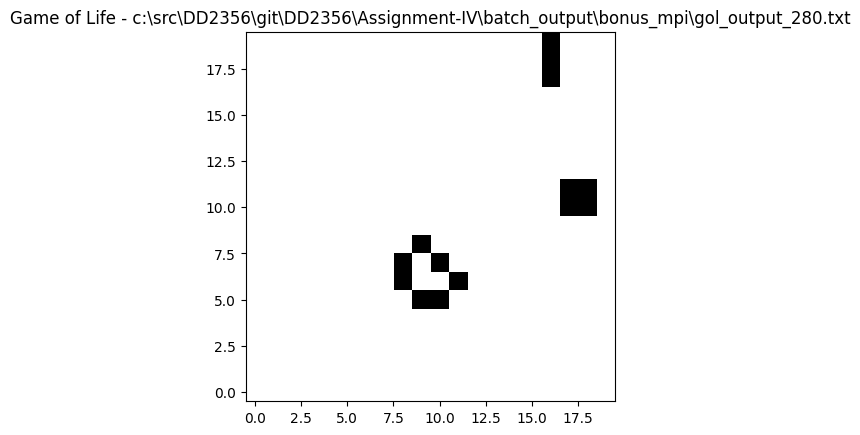

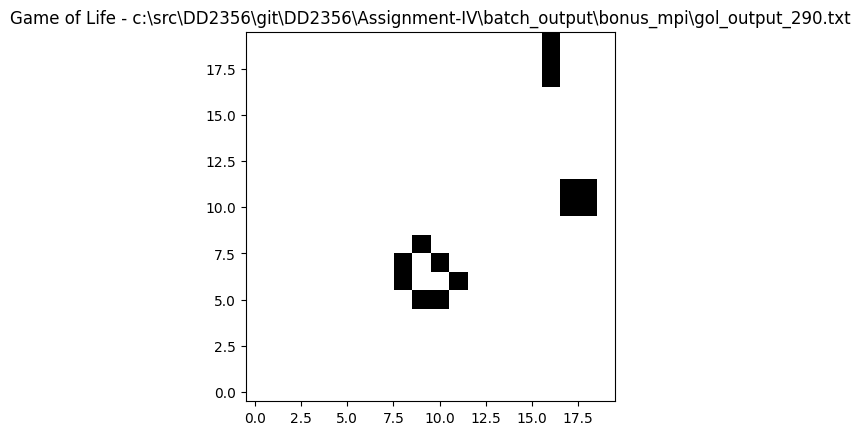

GIF saved at: c:\src\DD2356\git\DD2356\Assignment-IV\batch_output\bonus_mpi\game_of_life_mpi.gif


In [101]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import imageio.v2 as imageio  # imageio.v2 to avoid FutureWarnings

# Set up directories and file matching
current_working_directory = os.getcwd()
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'bonus_mpi'))
pattern = os.path.join(base_directory, "gol_output_*.txt")
files = glob.glob(pattern)

# Sort files numerically by step number
files_sorted = sorted(
    files,
    key=lambda path: int(os.path.splitext(os.path.basename(path))[0].split('_')[-1])
)

# Create temporary list of images
images = []
for file in files_sorted:
    data = np.loadtxt(file)
    fig, ax = plt.subplots()
    ax.imshow(data, cmap='binary', origin='lower')
    ax.set_title(f"Step {os.path.basename(file)}")
    ax.axis('off')

    # Save to a temporary image buffer
    temp_path = f"{file}.png"
    plt.savefig(temp_path, bbox_inches='tight')
    plt.close(fig)
    images.append(imageio.imread(temp_path))
    os.remove(temp_path)  # clean up temporary image

# Save the gif
gif_path = os.path.join(base_directory, "game_of_life_mpi.gif")
imageio.mimsave(gif_path, images, duration=5.0)

for file in files_sorted:
    data = np.loadtxt(file)
    plt.imshow(data, cmap='binary', origin='lower')
    plt.title(f"Game of Life - {file}")
    plt.pause(0.5)

plt.show()

print(f"GIF saved at: {gif_path}")


# Ex4 CBlas

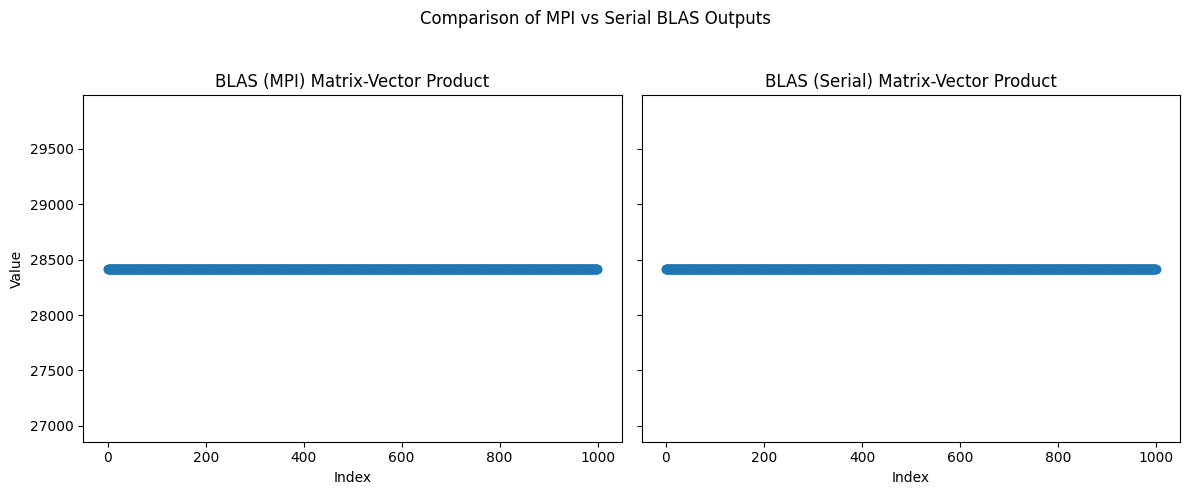

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# locate the directory
cwd = os.getcwd()
base_directory = os.path.normpath(os.path.join(cwd, 'batch_output', 'ex4'))

# file paths
file_mpi    = os.path.join(base_directory, "blas_output.txt")
file_serial = os.path.join(base_directory, "blas_serial_output.txt")

# load data
data_mpi    = np.loadtxt(file_mpi)
data_serial = np.loadtxt(file_serial)

# create two subplots, side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# MPI version
ax1.plot(data_mpi, marker='o', linestyle='-')
ax1.set_title("BLAS (MPI) Matrix-Vector Product")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")

# Serial version
ax2.plot(data_serial, marker='o', linestyle='-')
ax2.set_title("BLAS (Serial) Matrix-Vector Product")
ax2.set_xlabel("Index")
# sharey=True means ax2 will share the same y-axis

plt.suptitle("Comparison of MPI vs Serial BLAS Outputs")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Ex4 Strong Scaling

Scanning c:\src\DD2356\git\DD2356\Assignment-IV\batch_output\ex4, found 37 candidate files:
   ex4_mpi_1_1000000_output.stdout
   ex4_mpi_1_100000_output.stdout
   ex4_mpi_1_10000_output.stdout
   ex4_mpi_1_1000_output.stdout
   ex4_mpi_2_1000000_output.stdout
   ex4_mpi_2_100000_output.stdout
   ex4_mpi_2_10000_output.stdout
   ex4_mpi_2_1000_output.stdout
   ex4_mpi_4_1000000_output.stdout
   ex4_mpi_4_100000_output.stdout
   ex4_mpi_4_10000_output.stdout
   ex4_mpi_4_1000_output.stdout
   ex4_mpi_8_1000000_output.stdout
   ex4_mpi_8_100000_output.stdout
   ex4_mpi_8_10000_output.stdout
   ex4_mpi_8_1000_output.stdout
   ex4_mpi_stat_1_1000.stat
   ex4_mpi_stat_1_10000.stat
   ex4_mpi_stat_1_100000.stat
   ex4_mpi_stat_2_1000.stat
   ex4_mpi_stat_2_10000.stat
   ex4_mpi_stat_4_1000.stat
   ex4_mpi_stat_4_10000.stat
   ex4_mpi_stat_8_1000.stat
   ex4_mpi_stat_8_10000.stat
   ex4_serial_1000000_output.stdout
   ex4_serial_100000_output.stdout
   ex4_serial_10000_output.stdout
   ex4_se

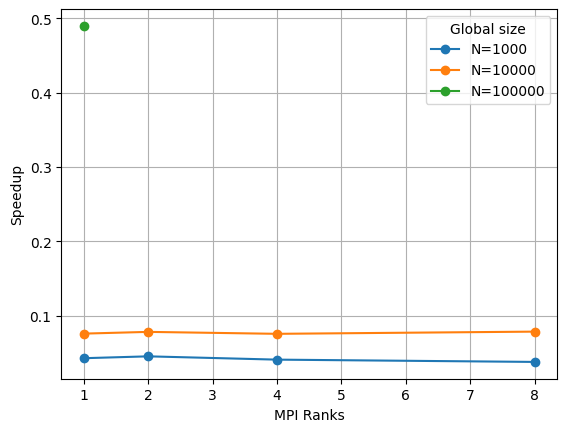

In [119]:
import re
import os
import matplotlib.pyplot as plt

def find_data_files(base_dir):
    pattern = os.path.join(base_dir, "ex4_*")
    files = glob.glob(pattern)
    print(f"Scanning {base_dir}, found {len(files)} candidate files:")
    for f in sorted(files):
        print("  ", os.path.basename(f))
    return files

def parse_serial_times(files):
    serial = {}
    for path in files:
        name = os.path.basename(path).lower()
        if "serial" not in name:
            continue
        if os.path.getsize(path) == 0:
            print(f"  [skip empty] {name}")
            continue

        text = open(path).read()
        m = re.search(r"([0-9]+\.?[0-9]*)\s+seconds\s+time\s+elapsed", text)
        if not m:
            print(f"  [skip no-timestamp] {name}")
            continue

        # infer N as the last integer in the filename
        nums = list(map(int, re.findall(r"(\d+)", name)))
        if not nums:
            print(f"  [skip no-size] {name}")
            continue
        N = nums[-1]

        t = float(m.group(1))
        serial[N] = t
        print(f"  [serial] N={N} → {t:.6f}s")
    return serial

import os, re

def parse_parallel_strong_times(files):
    """
    Parse timing files for a single‐node strong‐scaling test.
    Expects filenames like …_R_N… where:
      - R = total MPI ranks used
      - N = global problem size
    Returns:
      { N: { ranks: elapsed_seconds, … }, … }
    """
    parallel = {}
    for path in files:
        name = os.path.basename(path).lower()
        if "ex4_mpi_stat" not in name:
            continue

        if os.path.getsize(path) == 0:
            print(f"  [skip empty] {name}")
            continue

        # now the first group is total ranks, second is N
        m = re.match(r".*?_(\d+)_(\d+)", name)
        if not m:
            print(f"  [skip bad-name] {name}")
            continue

        ranks = int(m.group(1))
        N      = int(m.group(2))

        # pull out the elapsed time
        text = open(path).read()
        t_m = re.search(r"([0-9]+\.?[0-9]*)\s+seconds\s+time\s+elapsed", text)
        if not t_m:
            print(f"  [skip no-timestamp] {name}")
            continue
        t = float(t_m.group(1))

        # store under parallel[N][ranks]
        parallel.setdefault(N, {})[ranks] = t
        print(f"  [MPI] N={N}, ranks={ranks} → {t:.6f}s")

    return parallel


def calculate_speedup(serial, parallel):
    speedup = {}

    for N, times in parallel.items():
        # only compute if we have a serial time
        if N not in serial:
            continue
        Ts = serial[N]

        for ranks, Tp in times.items():
            s = Ts / Tp
            speedup.setdefault(N, {})[ranks] = s
            print(f"  [Speedup] N={N}, ranks={ranks} → {s:.3f}×")

    return speedup

def plot_speedup(speedup):
    """
    speedup: { 
      N1: { ranks1: s1, ranks2: s2, … }, 
      N2: { … }, 
      …
    }
    """
    plt.figure()
    for N, rank_dict in sorted(speedup.items()):
        ranks   = sorted(rank_dict.keys())
        su_vals = [ rank_dict[r] for r in ranks ]
        plt.plot(ranks, su_vals, 'o-', label=f"N={N}")

    plt.xlabel("MPI Ranks")
    plt.ylabel("Speedup")
    # plt.title("Strong Scaling Speedup")
    plt.grid(True)
    plt.legend(title="Global size")
    plt.show()

                        
def main(): 
    base_dir = os.path.join(os.getcwd(), "batch_output", "ex4")
    files    = find_data_files(base_dir)

    serial   = parse_serial_times(files)
    parallel_strong = parse_parallel_strong_times(files)
    speedup_strong = calculate_speedup(serial, parallel_strong)
    
    plot_speedup(speedup_strong)
    
    
main()
    

# Ex2 Strong Scaling / Weak scaling

Scanning c:\src\DD2356\git\DD2356\Assignment-IV\batch_output\ex2, found 260 candidate files:
   ex2_ex2_p_N1.stderr
   ex2_ex2_p_N2.stderr
   ex2_ex2_p_N4.stderr
   ex2_parallel_strong_sum_2_1_1000.data
   ex2_parallel_strong_sum_2_1_10000.data
   ex2_parallel_strong_sum_2_1_100000.data
   ex2_parallel_strong_sum_2_1_1000000.data
   ex2_parallel_strong_sum_2_2_1000.data
   ex2_parallel_strong_sum_2_2_10000.data
   ex2_parallel_strong_sum_2_2_100000.data
   ex2_parallel_strong_sum_2_2_1000000.data
   ex2_parallel_strong_sum_2_4_1000.data
   ex2_parallel_strong_sum_2_4_10000.data
   ex2_parallel_strong_sum_2_4_100000.data
   ex2_parallel_strong_sum_2_4_1000000.data
   ex2_parallel_strong_sum_2_8_1000.data
   ex2_parallel_strong_sum_2_8_10000.data
   ex2_parallel_strong_sum_2_8_100000.data
   ex2_parallel_strong_sum_2_8_1000000.data
   ex2_parallel_strong_sum_4_1_1000.data
   ex2_parallel_strong_sum_4_1_10000.data
   ex2_parallel_strong_sum_4_1_100000.data
   ex2_parallel_strong_sum_4_1_1

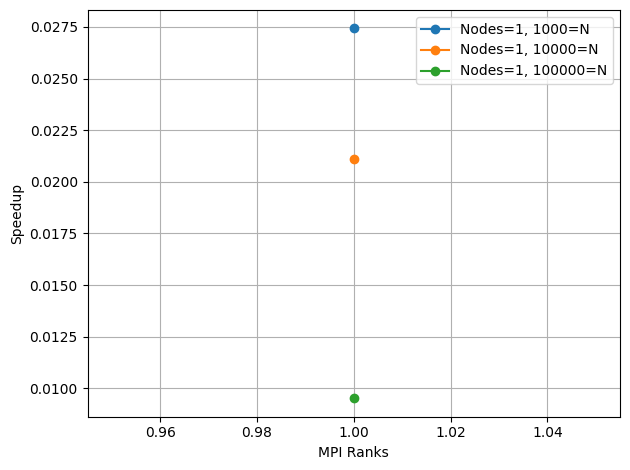

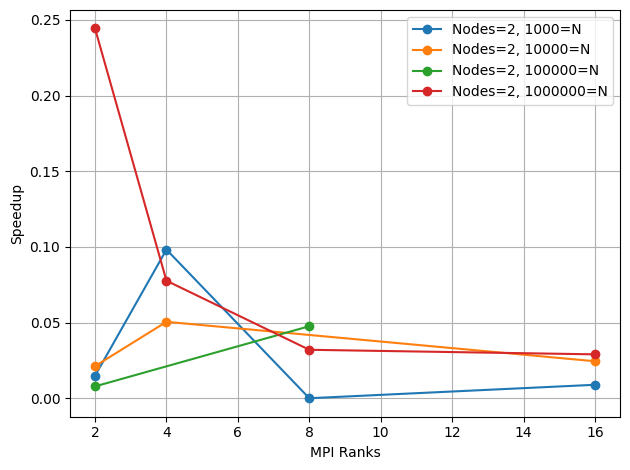

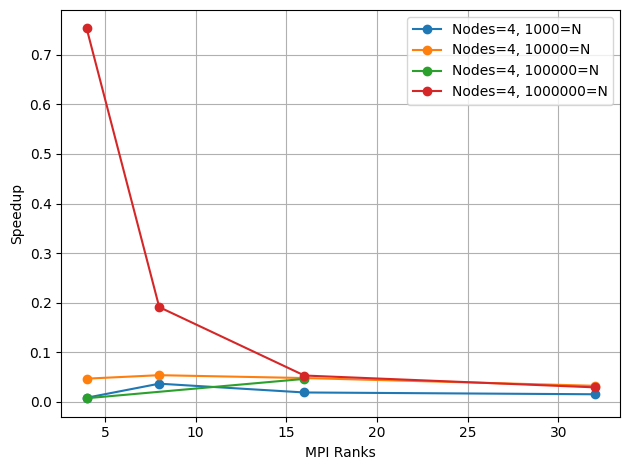

In [131]:
#!/usr/bin/env python3
import os
import re
import glob
import sys
import numpy as np
import matplotlib.pyplot as plt

def find_data_files(base_dir):
    pattern = os.path.join(base_dir, "ex2_*")
    files = glob.glob(pattern)
    print(f"Scanning {base_dir}, found {len(files)} candidate files:")
    for f in sorted(files):
        print("  ", os.path.basename(f))
    return files


def parse_serial_times(files):
    serial = {}
    for path in files:
        name = os.path.basename(path).lower()
        if "serial" not in name:
            continue
        if os.path.getsize(path) == 0:
            print(f"  [skip empty] {name}")
            continue

        text = open(path).read()
        m = re.search(r"([0-9]+\.?[0-9]*)\s+seconds\s+time\s+elapsed", text)
        if not m:
            print(f"  [skip no-timestamp] {name}")
            continue

        # infer N as the last integer in the filename
        nums = list(map(int, re.findall(r"(\d+)", name)))
        if not nums:
            print(f"  [skip no-size] {name}")
            continue
        N = nums[-1]

        t = float(m.group(1))
        serial[N] = t
        print(f"  [serial] N={N} → {t:.6f}s")
    return serial


def parse_parallel_strong_times(files):
    parallel = {}
    for path in files:
        name = os.path.basename(path).lower()
        if "parallel_strong_sum" not in name:
            continue
        if os.path.getsize(path) == 0:
            print(f"  [skip empty] {name}")
            continue

        mfn = re.match(r".*?_n(\d+)_(\d+)_(\d+)", name)
        if not mfn:
            print(f"  [skip bad-name] {name}")
            continue
        nodes = int(mfn.group(1))
        ppn   = int(mfn.group(2))
        N     = int(mfn.group(3))
        ranks = nodes * ppn

        text = open(path).read()
        m = re.search(r"([0-9]+\.?[0-9]*)\s+seconds\s+time\s+elapsed", text)
        if not m:
            print(f"  [skip no-timestamp] {name}")
            continue
        t = float(m.group(1))

        # now nest by nodes → N → ranks
        parallel.setdefault(nodes, {}) \
                .setdefault(N, {})[ranks] = t
        print(f"  [MPI] nodes={nodes}, N={N}, ranks={ranks} → {t:.6f}s")
    return parallel


def parse_parallel_weak_times(files):
    parallel = {}
    for path in files:
        name = os.path.basename(path).lower()
        if "parallel_weak_sum" not in name:
            continue
        if os.path.getsize(path) == 0:
            print(f"  [skip empty] {name}")
            continue

        mfn = re.match(r".*?_n(\d+)_(\d+)_(\d+)", name)
        if not mfn:
            print(f"  [skip bad-name] {name}")
            continue
        nodes = int(mfn.group(1))
        ppn   = int(mfn.group(2))
        N     = int(mfn.group(3))
        ranks = nodes * ppn

        text = open(path).read()
        m = re.search(r"([0-9]+\.?[0-9]*)\s+seconds\s+time\s+elapsed", text)
        if not m:
            print(f"  [skip no-timestamp] {name}")
            continue
        t = float(m.group(1))

        # now nest by nodes → N → ranks
        parallel.setdefault(nodes, {}) \
                .setdefault(N, {})[ranks] = t
        print(f"  [MPI] nodes={nodes}, N={N}, ranks={ranks} → {t:.6f}s")
    return parallel


def calculate_speedup(serial, parallel):
    speedup = {}
    for nodes, sizes in parallel.items():
        for N, times in sizes.items():
            # skip if no matching serial time
            if N not in serial:
                continue
            Ts = serial[N]
            for ranks, Tp in times.items():
                s = Ts / Tp
                speedup.setdefault(nodes, {}) \
                        .setdefault(N, {})[ranks] = s
    return speedup


def plot_speedup(speedup):
    for N in sorted(speedup):
        plt.figure()
        for nodes in sorted(speedup[N]):
            # only for weak scaling
            # if nodes >= 6000:
            #     continue
            ranks = sorted(speedup[N][nodes])
            su_vals = [speedup[N][nodes][r] for r in ranks]
            plt.plot(ranks, su_vals,"o-",label=f"Nodes={N}, {nodes}=N")
        # plt.title(f"Speedup vs. Ranks for N = {N}")
        plt.xlabel("MPI Ranks")
        plt.ylabel("Speedup")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


def main():
    base_dir = os.path.join(os.getcwd(), "batch_output", "ex2")
    files    = find_data_files(base_dir)

    serial   = parse_serial_times(files)
    parallel_strong = parse_parallel_strong_times(files)
    parallel_weak = parse_parallel_weak_times(files)

    # Compute performance metrics
    speedup_strong      = calculate_speedup(serial, parallel_strong)
    speedup_weak      = calculate_speedup(serial, parallel_weak)
    plot_speedup(speedup_strong)
    #plot_speedup(speedup_weak)

if __name__ == "__main__":
    main()


# ex2 computation time vs execution time 

DataFrame columns: ['nodes', 'procs', 'size', 'elapsed', 'compute']
  • No runs for nodes=1, size=1000000
Elapsed vs Compute Time — nodes=2, size=1000000


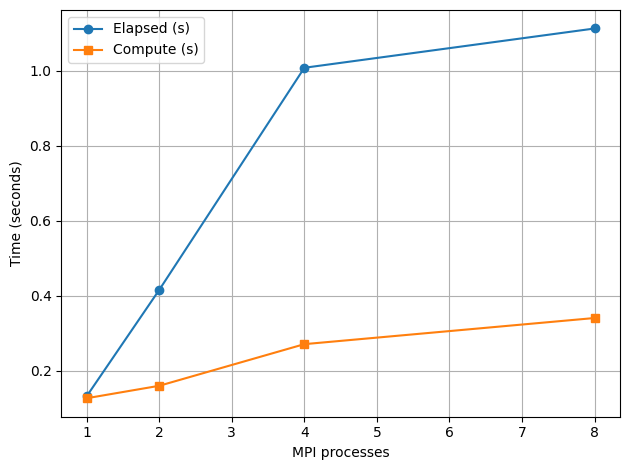

Elapsed vs Compute Time — nodes=4, size=1000000


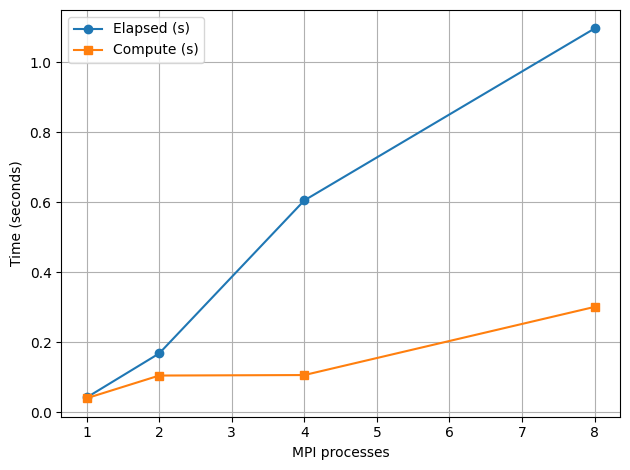

In [100]:
import os
import re
import glob
import matplotlib.pyplot as plt
import pandas as pd

base_dir = os.path.join(os.getcwd(), "batch_output", "ex2")
pattern = os.path.join(base_dir, "ex2_parallel_strong_sum_n*_*.data")

fname_re = re.compile(r".*_n(?P<nodes>\d+)_(?P<procs>\d+)_(?P<size>\d+)\.data$")

elapsed_re = re.compile(r"([0-9]+\.?[0-9]*)\s+seconds\s+time\s+elapsed")
task_re    = re.compile(r"([0-9]+\.?[0-9,]*)\s+msec\s+task-clock")

records = []
for filepath in glob.glob(pattern):
    name = os.path.basename(filepath)
    name_match = fname_re.match(name)
    if not name_match:
        continue

    text = open(filepath, 'r').read()
    m_elapsed = elapsed_re.search(text)
    m_task    = task_re.search(text)
    if not m_elapsed or not m_task:
        continue

    nodes   = int(name_match.group("nodes"))
    procs   = int(name_match.group("procs"))
    size    = int(name_match.group("size"))
    elapsed = float(m_elapsed.group(1))
    compute = float(m_task.group(1).replace(",", "")) / 1000.0

    records.append({
        "nodes": nodes,
        "procs": procs,
        "size": size,
        "elapsed": elapsed,
        "compute": compute
    })

df = pd.DataFrame(records)
print("DataFrame columns:", df.columns.tolist())
if df.empty:
    print("No data parsed. Check your file pattern and regex.")
else:
    fixed_size = 1000000

    for n in sorted(df['nodes'].unique()):
        sub = df[(df['nodes']==n) & (df['size']==fixed_size)].sort_values('procs')
        if sub.empty:
            print(f"  • No runs for nodes={n}, size={fixed_size}")
            continue
        print(f'Elapsed vs Compute Time — nodes={n}, size={fixed_size}')
        plt.figure()
        plt.plot(sub['procs'], sub['elapsed'], marker='o', label='Elapsed (s)')
        plt.plot(sub['procs'], sub['compute'], marker='s', label='Compute (s)')
        plt.xlabel('MPI processes')
        plt.ylabel('Time (seconds)')
        # plt.title(f'Elapsed vs Compute Time — nodes={n}, size={fixed_size}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

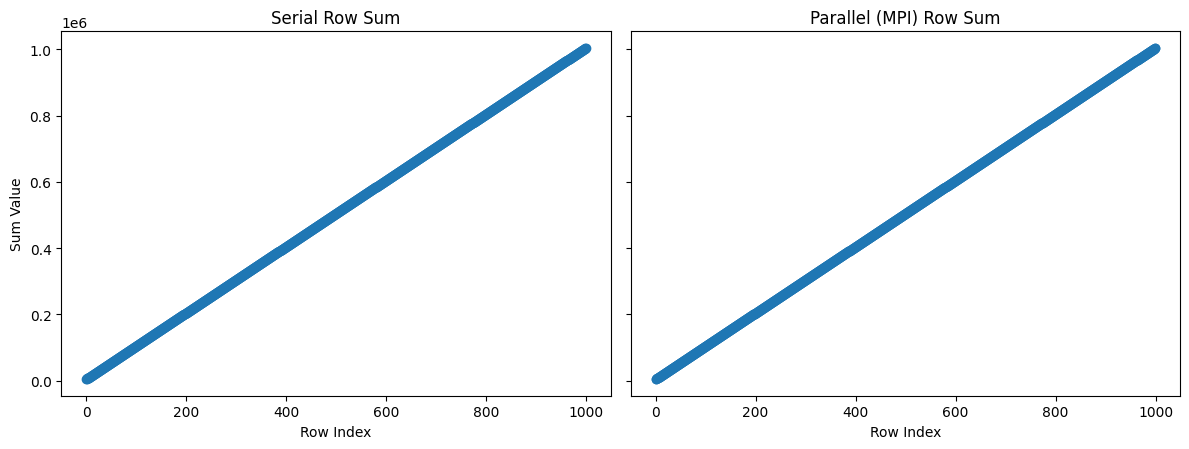

In [109]:
import os
import numpy as np
import matplotlib.pyplot as plt

# adjust these two paths to point at your serial vs. MPI outputs
base_dir = os.path.join(os.getcwd(), "batch_output", "ex2", "ex_2_mpi")
pattern_serial = os.path.join(base_dir, "row_sums_output.txt")
pattern_mpi    = os.path.join(base_dir, "mpi_row_sums_output.txt")

# load data
data_serial = np.loadtxt(pattern_serial)
data_mpi    = np.loadtxt(pattern_mpi)

# create a figure with two side-by-side axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# serial plot
ax1.plot(data_serial, marker='o', linestyle='-')
ax1.set_title("Serial Row Sum")
ax1.set_xlabel("Row Index")
ax1.set_ylabel("Sum Value")

# MPI plot
ax2.plot(data_mpi,    marker='o', linestyle='-')
ax2.set_title("Parallel (MPI) Row Sum")
ax2.set_xlabel("Row Index")
# sharey=True already makes ax2 y-axis match ax1

# overall title and layout
# fig.suptitle("Row Sum Computation: Serial vs. MPI")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for suptitle

plt.show()


Comparison of the execution time between ex2 (naive version) and ex4 for N=1000

[ex2] scanning batch_output\ex2: found 233 files
[ex4] scanning batch_output\ex4: found 37 files
  [ex2] N=1000, R=1 → 0.412s
  [ex2] N=10000, R=1 → 1.913s
  [ex2] N=100000, R=1 → 2.851s
  [ex2] N=1000, R=2 → 0.761s
  [ex2] N=10000, R=2 → 1.903s
  [ex2] N=100000, R=2 → 3.465s
  [ex2] N=1000000, R=2 → 0.132s
  [ex2] N=1000, R=4 → 0.115s
  [ex2] N=10000, R=4 → 0.800s
  [ex2] N=1000000, R=4 → 0.415s
  [ex2] N=1000, R=8 → 598.710s
  [ex2] N=100000, R=8 → 0.570s
  [ex2] N=1000000, R=8 → 1.007s
  [ex2] N=1000, R=16 → 1.268s
  [ex2] N=10000, R=16 → 1.652s
  [ex2] N=1000000, R=16 → 1.112s
  [ex2] N=1000, R=4 → 1.331s
  [ex2] N=10000, R=4 → 0.860s
  [ex2] N=100000, R=4 → 3.632s
  [ex2] N=1000000, R=4 → 0.043s
  [ex2] N=1000, R=8 → 0.307s
  [ex2] N=10000, R=8 → 0.749s
  [ex2] N=1000000, R=8 → 0.169s
  [ex2] N=1000, R=16 → 0.592s
  [ex2] N=10000, R=16 → 0.838s
  [ex2] N=100000, R=16 → 0.584s
  [ex2] N=1000000, R=16 → 0.606s
  [ex2] N=1000, R=32 → 0.730s
  [ex2] N=10000, R=32 → 1.241s
  [ex2] N=10

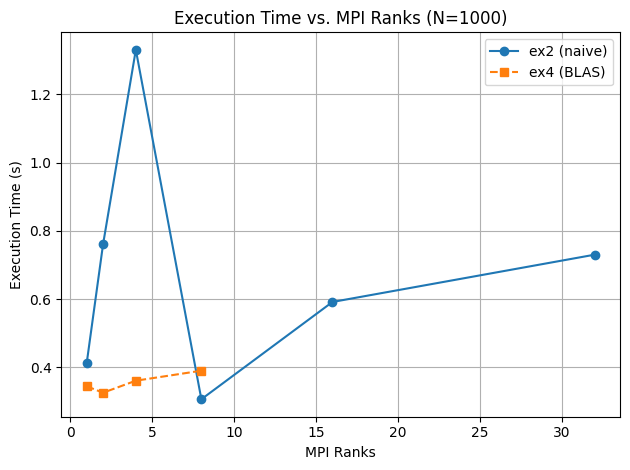

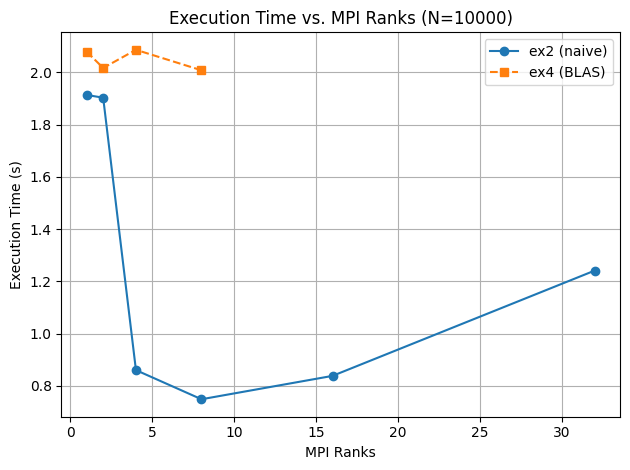

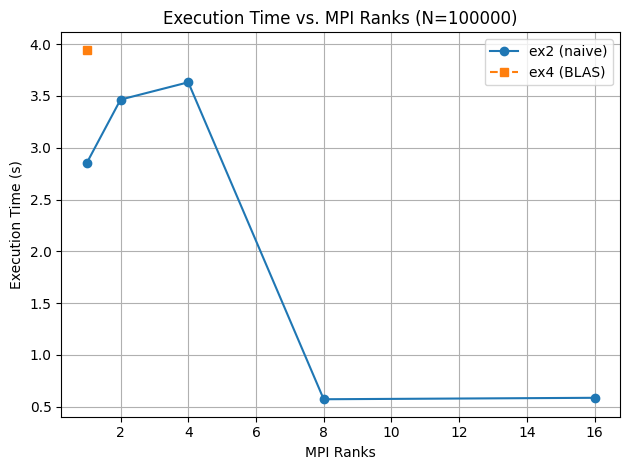

In [122]:
#!/usr/bin/env python3
import os
import re
import glob
import matplotlib.pyplot as plt

def find_files(base_dir, prefix):
    """Return sorted list of all files beginning with prefix_ under base_dir."""
    pattern = os.path.join(base_dir, f"{prefix}_*")
    files = sorted(glob.glob(pattern))
    print(f"[{prefix}] scanning {base_dir}: found {len(files)} files")
    return files

def parse_ex2_times(files):
    """
    Parse ex2 strong-scaling logs:
      - filenames contain 'parallel_strong_sum'
      - name pattern: …_n<Nnodes>_<ppn>_<N>_…parallel_strong_sum…
    Returns: { N: { ranks: time_s, … }, … }
    """
    times = {}
    for path in files:
        name = os.path.basename(path).lower()
        if "parallel_strong_sum" not in name or os.path.getsize(path) == 0:
            continue

        m = re.match(r".*?_n(\d+)_(\d+)_(\d+)", name)
        if not m:
            continue
        nodes, ppn, N = map(int, m.groups())
        R = nodes * ppn

        txt = open(path).read()
        tm = re.search(r"([0-9]+\.?[0-9]*)\s+seconds\s+time\s+elapsed", txt)
        if not tm:
            continue
        t = float(tm.group(1))

        times.setdefault(N, {})[R] = t
        print(f"  [ex2] N={N}, R={R} → {t:.3f}s")
    return times

def parse_ex4_times(files):
    """
    Parse ex4 strong-scaling logs:
      - filenames contain 'mpi_stat'
      - name pattern: …_mpi_stat_<ranks>_<N>
    Returns: { N: { ranks: time_s, … }, … }
    """
    times = {}
    for path in files:
        name = os.path.basename(path).lower()
        if "mpi_stat" not in name or os.path.getsize(path) == 0:
            continue

        m = re.match(r".*?_mpi_stat_(\d+)_(\d+)", name)
        if not m:
            continue
        R, N = map(int, m.groups())

        txt = open(path).read()
        tm = re.search(r"([0-9]+\.?[0-9]*)\s+seconds\s+time\s+elapsed", txt)
        if not tm:
            continue
        t = float(tm.group(1))

        times.setdefault(N, {})[R] = t
        print(f"  [ex4] N={N}, R={R} → {t:.3f}s")
    return times

def plot_execution_times(ex2, ex4):
    """
    For each N common to both, plot execution time vs. ranks
    with two curves: ex2 (naive) and ex4 (BLAS).
    """
    common = sorted(set(ex2.keys()) & set(ex4.keys()))
    if not common:
        print("No matching problem sizes (N) found in ex2 and ex4 logs.")
        return

    for N in common:
        plt.figure()
        # ex2 curve
        r2 = sorted(ex2[N].keys())
        t2 = [ex2[N][r] for r in r2]
        plt.plot(r2, t2, 'o-', label='ex2 (naive)')
        # ex4 curve
        r4 = sorted(ex4[N].keys())
        t4 = [ex4[N][r] for r in r4]
        plt.plot(r4, t4, 's--', label='ex4 (BLAS)')

        plt.xlabel("MPI Ranks")
        plt.ylabel("Execution Time (s)")
        plt.title(f"Execution Time vs. MPI Ranks (N={N})")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

def main():
    # adjust these paths if your directory tree differs
    dir_ex2 = os.path.join("batch_output", "ex2")
    dir_ex4 = os.path.join("batch_output", "ex4")

    files2 = find_files(dir_ex2, "ex2")
    files4 = find_files(dir_ex4, "ex4")

    times2 = parse_ex2_times(files2)
    times4 = parse_ex4_times(files4)

    plot_execution_times(times2, times4)

if __name__ == "__main__":
    main()
